In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import csv
import numpy as np
from datetime import date, datetime, time, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.dates import DateFormatter, MonthLocator, YearLocator
import matplotlib.dates as mdates
from statsmodels.graphics.mosaicplot import mosaic

In [6]:
# Reading data
df = pd.read_csv(r"C:\Users\Jeremy Zhao\Dropbox\Personal\Python\DUC\WellProduction.csv")
df1 = pd.read_csv(r"C:\Users\Jeremy Zhao\Dropbox\Personal\Python\DUC\WellHeader_Datathon.csv")
df2 = pd.read_csv(r"C:\Users\Jeremy Zhao\Dropbox\Personal\Python\DUC\PerfTreatments.csv")

#Oil and Gas Data
oil = pd.read_csv(r"C:\Users\Jeremy Zhao\Dropbox\Personal\Python\DUC\Crude Oil WTI Futures Historical Data.csv")
gas = pd.read_csv(r"C:\Users\Jeremy Zhao\Dropbox\Personal\Python\DUC\Natural Gas Futures Historical Data.csv")

In [3]:
# Datetime conversions

df['ProdPeriod'] = pd.to_datetime(df['ProdPeriod'])
df1['FinalDrillDate'] = pd.to_datetime(df1['FinalDrillDate'])
df1['SpudDate'] = pd.to_datetime(df1['SpudDate'])
df1['RigReleaseDate'] = pd.to_datetime(df1['RigReleaseDate'])
df1['LicenceDate'] = pd.to_datetime(df1['LicenceDate'])
df2['ActivityDate'] = pd.to_datetime(df2['ActivityDate'])
oil['Date'] = pd.to_datetime(oil['Date'])
gas['Date'] = pd.to_datetime(gas['Date'])

In [4]:
# Finding duplicated data

display(df[df.duplicated(["EPAssetsId", "ProdPeriod", "ProdType"])])
display(df1[df1.duplicated()])
display(df2[df2.duplicated()])

,EPAssetsId,ProdPeriod,ProdType,Volume,WellHeader.Match
168641,1167456,2019-01-31,Production Hours,608.000000,Yes
172076,1169598,2019-08-31,Production Hours,446.000000,Yes
172102,1174013,2019-08-31,Production Hours,420.000000,Yes
172134,1171134,2019-08-31,Production Hours,408.000000,Yes
172182,1169910,2019-08-31,Production Hours,336.000000,Yes
...,...,...,...,...,...
953917,1174083,2019-11-30,Gas Production (MMcf),5.085331,Yes
954063,1174255,2019-11-30,Gas Production (MMcf),0.738079,Yes
957381,1174736,2019-11-30,Gas Production (MMcf),0.794583,Yes
958177,1175043,2019-11-30,Gas Production (MMcf),1.716299,Yes


,EPAssetsId,Province,LicenceNumber,UWI,CurrentOperator,CurrentOperatorParent,CurrentOperatorParentName,Licensee,LicenseeParentCompany,LicenseeParentCompanyName,...,StatusSource,UnitID,UnitName,UnitFlag,Municipality,CompletionDate,Agent,_Completed`Flag,_Perf`Flag,Match


,EPAssetsId,EPAPTId,ObservationNumber,ActivityDate,ActivityType,IntervalTop,IntervalBase,PerfShots,WellHeader.Match


In [5]:
# Finds EPAssetsId with missing production hours

missing_prod_hours_list = set(df['EPAssetsId'].unique().tolist()) - set(df[df["ProdType"] == "Production Hours"]["EPAssetsId"].unique().tolist())
print(len(missing_prod_hours_list))

190


In [6]:
# Finds EPAssetsId with missing completion data

missing_perf_list = set(df['EPAssetsId'].unique().tolist()) - set(df2["EPAssetsId"].unique().tolist())
print(len(missing_perf_list))

299


In [7]:
# Cleaning data

df.drop(columns=['WellHeader.Match'],inplace =True,axis = 1)
df1.drop(columns=['Province', 'LicenceNumber', 'UWI', 'CurrentOperatorParent', 'CurrentOperatorParentName',
       'Licensee', 'LicenseeParentCompanyName', 'CurrentStatus',
       'CurrentStatusStandardised',
       'ConfidentialReleaseDate', 'AbandonDate', 'SurfAbandonDate', 'WellName',
       'Field', 'Pool', 'SurveySystem', 'Surf_Township', 'Surf_Meridian', 'Surf_Range', 'Surf_Section',
       'Surf_LSD', 'Surf_Longitude', 'Surf_Latitude', 'Surf_TownshipRange',
       'Surf_QuarterUnit', 'Surf_Unit', 'Surf_Block', 'Surf_NTSMapSheet',
       'Surf_Series', 'Surf_Area', 'Surf_Sheet', 'Surf_QuarterSection',
       'BH_Location', 'BH_TownshipRange', 'BH_QuarterUnit', 'BH_Unit',
       'BH_Block', 'BH_NTSMapSheet', 'BH_Series', 'BH_Area', 'BH_Sheet',
       'BH_QuarterSection', 'BH_Longitude', 'BH_Latitude', 'BH_Township',
       'BH_Meridian', 'BH_Range', 'BH_Section', 'BH_LSD', 'GroundElevation',
       'KBElevation', 'TotalDepth', 'LaheeClass', 'Confidential',
       'SurfaceOwner', 'OSArea', 'OSDeposit', 'DrillingContractor', 'DrillMetresPerDay',
       'TVD', 'WellProfile', 'Country', 'RegulatoryAgency', 'PSACAreaCode',
       'PSACAreaName', 'ProjectedDepth', 'StatusDate', 'StatusSource',
       'UnitID', 'UnitName', 'UnitFlag', 'Municipality', 'Agent', 'CompletionDate', '_Completed`Flag', '_Perf`Flag', 'Match'],inplace =True,axis = 1)
df2.drop(columns=['WellHeader.Match', 'EPAPTId', 'IntervalTop', 'IntervalBase'],inplace =True,axis = 1)

In [8]:
# Graph Styling

plt.style.use("ggplot")
colors = cm.Set2

In [9]:
# This just shows the defaults colors in "ggplot"

#colors = plt.rcParams['axes.prop_cycle'].by_key()['color']                       

#print('\n'.join(color for color in colors)) 

In [10]:
# This is a quick function since a lot of the dataframe merges use EPAssetsId
def merge_the_funcs(df1, df2):
    return pd.merge(df1, df2, on="EPAssetsId", how="outer")

<h2>0. Additional Filters</h2>
These are some additional filters to coordinate with other code that is being written.

In [11]:
max_date = '12/15/2019' # Remove any dates after a certain date
no_of_rep_period = 3 # This is the number of reporting periods being used.
days_btw_gaps = 32
days_btw_rig_prod = 64
total_days_oper = 61 # filters out wells that have operated for less than X days in total
days_btw_rig_perf = timedelta(days=64) # filters out wells that have a time delta greater than X between rig release and perforation
days_btw_perf_gaps = 32
days_btw_perf_prod = timedelta(days=64)

<h2>1A. License Finder</h2>
This shows all the surface locations and the number of well licenses they share based on a common license date. This will help identify the number wells that a rig(s) had to drill for that particular licence scope. For example, a license might show 3 wells at a common surface location that will come online at the same time. This would take longer to drill and complete vs a single well. On top of that, the first well would have to wait until the last well is completed in order to start production, making it seem like a DUC when it is not.

In [12]:
df1_adj = df1.copy()
df1_adj['LicencePeriod'] = df1_adj['LicenceDate'].dt.to_period('M')
#df1_adj = df1_adj.groupby(['Surf_Location','LicenceDate']).agg({'LicenceDate': 'count'}).rename(columns={'LicenceDate':'LicenceDateCount'}).reset_index()
df1_adj = df1_adj.groupby(['Surf_Location','LicencePeriod']).agg({'LicencePeriod': 'count', 'LicenceDate': 'max'}).rename(columns={'LicencePeriod':'LicenceDateCount'}).reset_index()
df1_adj['LicenceDate_str'] = df1_adj['LicenceDate'].values.astype(str)
df1_adj['LicencePeriod_str'] = df1_adj['LicencePeriod'].values.astype(str)
display(df1_adj)

,Surf_Location,LicencePeriod,LicenceDateCount,LicenceDate,LicenceDate_str,LicencePeriod_str
0,01-01-026-18W3,2016-07,2,2016-07-14,2016-07-14T00:00:00.000000000,2016-07
1,01-01-026-19W3,2016-11,2,2016-11-25,2016-11-25T00:00:00.000000000,2016-11
2,01-01-027-20W3,2016-09,1,2016-09-08,2016-09-08T00:00:00.000000000,2016-09
3,01-01-030-25W3,2017-11,1,2017-11-24,2017-11-24T00:00:00.000000000,2017-11
4,01-01-031-20W3,2015-02,3,2015-02-12,2015-02-12T00:00:00.000000000,2015-02
...,...,...,...,...,...,...
5728,D-083-D/094-G-08,2015-06,5,2015-06-10,2015-06-10T00:00:00.000000000,2015-06
5729,D-083-F/094-H-03,2014-11,3,2014-11-28,2014-11-28T00:00:00.000000000,2014-11
5730,D-083-K/094-A-12,2015-01,1,2015-01-14,2015-01-14T00:00:00.000000000,2015-01
5731,D-093-F/094-H-03,2017-02,3,2017-02-19,2017-02-19T00:00:00.000000000,2017-02


This is an example of wells on a common LSD but is divided into different wellpads by licence date. 

In [13]:
display(df1_adj[df1_adj['Surf_Location'] == '04-11-053-21-W5'])

,Surf_Location,LicencePeriod,LicenceDateCount,LicenceDate,LicenceDate_str,LicencePeriod_str
1309,04-11-053-21-W5,2018-09,1,2018-09-24,2018-09-24T00:00:00.000000000,2018-09
1310,04-11-053-21-W5,2018-11,1,2018-11-13,2018-11-13T00:00:00.000000000,2018-11


<h2>1B. License Finder With Adjusted Rig Release Date</h2>

In [14]:
df1copy = df1.copy()
df1copy['LicencePeriod'] = df1copy['LicenceDate'].dt.to_period('M')

def licence_adj(lic_df, ref_df):
    """Finds the initial and last rig release date based on well pad license date
    
    Args:
        lic_df (str): This is the licence finder dataframe
        ref_df (int): This is the production dataframe
    
    Returns:
        final_lic_df: Licence finder dataframe with adjusted rig release date
    """
    final_lic_df = pd.DataFrame(columns=['AdjRigReleaseDate', 'InitRigReleaseDate'])
    counter = 0
    for lsd in lic_df['Surf_Location']:
        filter1 = ref_df['Surf_Location'] == lsd
        asso_date = lic_df.iloc[counter]['LicencePeriod']
        counter += 1
        filter2 = ref_df['LicencePeriod'] == asso_date
        max_rig = pd.to_datetime(ref_df[filter1 & filter2]['RigReleaseDate'].max())
        min_rig = pd.to_datetime(ref_df[filter1 & filter2]['RigReleaseDate'].min())

        final_lic_df = final_lic_df.append({'AdjRigReleaseDate':max_rig, 'InitRigReleaseDate': min_rig}, ignore_index=True)  

    
    return final_lic_df

df1_adj2 = licence_adj(df1_adj, df1copy)
df1_adj['AdjRigReleaseDate'] = df1_adj2['AdjRigReleaseDate']
df1_adj['AdjRigReleaseDate_str'] = df1_adj['AdjRigReleaseDate'].values.astype(str)
df1_adj['InitRigReleaseDate'] = df1_adj2['InitRigReleaseDate']
df1_adj['InitRigReleaseDate_str'] = df1_adj['InitRigReleaseDate'].values.astype(str)
display(df1_adj)

,Surf_Location,LicencePeriod,LicenceDateCount,LicenceDate,LicenceDate_str,LicencePeriod_str,AdjRigReleaseDate,AdjRigReleaseDate_str,InitRigReleaseDate,InitRigReleaseDate_str
0,01-01-026-18W3,2016-07,2,2016-07-14,2016-07-14T00:00:00.000000000,2016-07,2016-11-08,2016-11-08T00:00:00.000000000,2016-11-06,2016-11-06T00:00:00.000000000
1,01-01-026-19W3,2016-11,2,2016-11-25,2016-11-25T00:00:00.000000000,2016-11,2017-01-30,2017-01-30T00:00:00.000000000,2017-01-27,2017-01-27T00:00:00.000000000
2,01-01-027-20W3,2016-09,1,2016-09-08,2016-09-08T00:00:00.000000000,2016-09,2016-11-18,2016-11-18T00:00:00.000000000,2016-11-18,2016-11-18T00:00:00.000000000
3,01-01-030-25W3,2017-11,1,2017-11-24,2017-11-24T00:00:00.000000000,2017-11,2018-01-10,2018-01-10T00:00:00.000000000,2018-01-10,2018-01-10T00:00:00.000000000
4,01-01-031-20W3,2015-02,3,2015-02-12,2015-02-12T00:00:00.000000000,2015-02,2015-03-01,2015-03-01T00:00:00.000000000,2015-02-24,2015-02-24T00:00:00.000000000
...,...,...,...,...,...,...,...,...,...,...
5728,D-083-D/094-G-08,2015-06,5,2015-06-10,2015-06-10T00:00:00.000000000,2015-06,2015-12-04,2015-12-04T00:00:00.000000000,2015-09-09,2015-09-09T00:00:00.000000000
5729,D-083-F/094-H-03,2014-11,3,2014-11-28,2014-11-28T00:00:00.000000000,2014-11,2016-12-29,2016-12-29T00:00:00.000000000,2016-12-08,2016-12-08T00:00:00.000000000
5730,D-083-K/094-A-12,2015-01,1,2015-01-14,2015-01-14T00:00:00.000000000,2015-01,2015-08-02,2015-08-02T00:00:00.000000000,2015-08-02,2015-08-02T00:00:00.000000000
5731,D-093-F/094-H-03,2017-02,3,2017-02-19,2017-02-19T00:00:00.000000000,2017-02,2017-05-12,2017-05-12T00:00:00.000000000,2017-04-14,2017-04-14T00:00:00.000000000


This is an example of wells on a common LSD but is divided into different wellpads by licence date. 

In [16]:
display(df1_adj[df1_adj['Surf_Location'] == '06-16-080-17-W6'])

,Surf_Location,LicencePeriod,LicenceDateCount,LicenceDate,LicenceDate_str,LicencePeriod_str,AdjRigReleaseDate,AdjRigReleaseDate_str,InitRigReleaseDate,InitRigReleaseDate_str
2097,06-16-080-17-W6,2014-12,8,2014-12-22,2014-12-22T00:00:00.000000000,2014-12,2017-02-04,2017-02-04T00:00:00.000000000,2016-11-26,2016-11-26T00:00:00.000000000
2098,06-16-080-17-W6,2017-08,12,2017-08-17,2017-08-17T00:00:00.000000000,2017-08,2018-10-06,2018-10-06T00:00:00.000000000,2017-09-30,2017-09-30T00:00:00.000000000


<h1> 2. Filter by number of reporting periods</h1>
Each time frame reported is a period and not necessarily a month. This following function helps retrieve the first X number of reporting periods per well.

<b>It is my understanding is that iterating over rows in a DataFrame is not good practise and is a slow process. This might not be great for the full dataset.</b>

In [17]:
def initial_periods(df, periods=5):
    """Get the initial x periods of production from each well as specified by the user
    Args:
        df (str): This is the Well Production DataFrame being used
        dt (int): This is the number of initial reporting periods for the well(s)
    
    Returns:
        initial_prodf Filtered Dataframe with x initial reporting periods of production. Dataframe also contains
        gap days per reporting period, and cumulative gap days between reporting period.
    """
    initial_prodf = pd.DataFrame()
    for well in df['EPAssetsId'].unique():
        initial_dataf = df[(df['ProdType'] == 'Production Hours') 
                           & (df['EPAssetsId']== well)].sort_values(by='ProdPeriod', ascending=True)
        initial_dataf['gaps'] = initial_dataf['ProdPeriod'].diff().dt.total_seconds()/3600/24
        initial_dataf['gapsdays'] = initial_dataf['ProdPeriod'].diff()
        initial_dataf['gapscumsum'] = initial_dataf['gaps'].cumsum()
        initial_dataf = initial_dataf.head(periods)
        initial_prodf = initial_prodf.append(initial_dataf, ignore_index=True)
        
    return initial_prodf

df_modified1 = initial_periods(df, no_of_rep_period)
display(df_modified1)

,EPAssetsId,ProdPeriod,ProdType,Volume,gaps,gapsdays,gapscumsum
0,1159612,2016-02-29,Production Hours,696.0,NaN,NaT,NaN
1,1159612,2016-03-31,Production Hours,744.0,31.0,31 days,31.0
2,1159612,2016-04-30,Production Hours,720.0,30.0,30 days,61.0
3,1166272,2017-11-30,Production Hours,720.0,NaN,NaT,NaN
4,1166272,2017-12-31,Production Hours,744.0,31.0,31 days,31.0
...,...,...,...,...,...,...,...
30214,41005,2017-07-31,Production Hours,739.2,NaN,NaT,NaN
30215,41005,2017-08-31,Production Hours,741.6,31.0,31 days,31.0
30216,2619839,2019-12-31,Production Hours,740.0,NaN,NaT,NaN
30217,2619839,2020-01-31,Production Hours,743.0,31.0,31 days,31.0


<h1> 3. Earliest and last production dates</h1>
This shows the first and last production date of each well

In [18]:
df_earliest_prod_date = df.loc[df.groupby("EPAssetsId")["ProdPeriod"].idxmin()].reset_index() 

df_earliest_prod_date = df_earliest_prod_date.rename(columns={'ProdPeriod': 'Earliest Production Date'})
df_last_prod_date = df.groupby("EPAssetsId")["ProdPeriod"].max().to_frame(name = "Last Production Date").reset_index()

df_prod_dates = merge_the_funcs(df_earliest_prod_date, df_last_prod_date)
df_prod_dates.drop(columns=['index'],inplace =True,axis = 1)
df_prod_dates['Delta_Date'] = df_prod_dates['Last Production Date'] - df_prod_dates['Earliest Production Date']
df_prod_dates = df_prod_dates[df_prod_dates['Delta_Date'] >= timedelta(days= total_days_oper)] # filters out wells that have operated for less than X days in total
df_prod_dates = df_prod_dates[df_prod_dates['Earliest Production Date'] < max_date] # filters out wells that operated after max_date

display(df_prod_dates.sort_values(by="Earliest Production Date"))

,EPAssetsId,Earliest Production Date,ProdType,Volume,Last Production Date,Delta_Date
1785,1149788,2015-01-31,Production Hours,144.0,2020-01-31,1826 days
1741,1149172,2015-01-31,Production Hours,312.0,2020-01-31,1826 days
5965,2583393,2015-01-31,Production Hours,144.0,2020-01-31,1826 days
1754,1149678,2015-01-31,Production Hours,24.0,2020-01-31,1826 days
1847,1150495,2015-01-31,Production Hours,264.0,2020-01-31,1826 days
...,...,...,...,...,...,...
10230,2621404,2019-11-30,Production Hours,60.0,2020-01-31,62 days
10231,2621405,2019-11-30,Production Hours,186.0,2020-01-31,62 days
10232,2621406,2019-11-30,Production Hours,43.0,2020-01-31,62 days
10224,2621388,2019-11-30,Production Hours,77.0,2020-01-31,62 days


<h1>4A: Drop Non Completion Activity</h1>
For simplicity, all non-completion activity is dropped. There are some events for example that happen years after completions on a well, and so that will be excluded from this analysis.

In [19]:
df2_copy = df2.copy()
df2_drop_list = ['Other', 'Acid Squeeze',
       'Bridge Plug Set', 'Acid Wash', 'Acidize', 'Remedial',
       'Cement Squeeze', 'Remedial Casing Cementing',
       'Cement Plug', 'Multi-Stage Fracture - Port Closed',
       'Bridge Plug - No Cement', 'Packing Device Capped w/Cement',
       'Chemical Squeeze', 'Casing Patch', 'Acid Treatment']
df2_copy = df2_copy[~df2_copy['ActivityType'].isin(df2_drop_list)]
display(df2_copy[df2_copy['EPAssetsId'] == 2606177])

,EPAssetsId,ObservationNumber,ActivityDate,ActivityType,PerfShots
401,2606177,2.0,2017-08-29,Perforation,20.0
278218,2606177,1.0,2017-08-20,Open Hole/Barefoot Completion,0.0
283926,2606177,3.0,2017-08-31,Fracture,0.0


<h1>4B. Types of Activity Counts in PerfTreatment File</h1>
Finds the unique number of activity types per EPAssetId

In [20]:
df2_mod = df2_copy.groupby(['EPAssetsId']).agg({'ActivityType': 'nunique'}).rename(columns={'ActivityType':'ActivityTypeCount'}).reset_index()

display(df2_mod)

,EPAssetsId,ActivityTypeCount
0,3373,2
1,6976,2
2,6977,2
3,7129,2
4,7130,2
...,...,...
10103,2624626,1
10104,2624627,1
10105,2624628,1
10106,2624670,2


<h1>4C. First and Last Completion Observation Dates</h1>

In [21]:
df2_first_obv = df2_copy.loc[df2_copy.groupby("EPAssetsId")["ActivityDate"].idxmin()].reset_index()
df2_first_obv = df2_first_obv.rename(columns={'ActivityDate': 'FirstPerfDate'})
df2_first_obv.drop(columns=['index', 'ObservationNumber', 'ActivityType', 'PerfShots'],inplace =True,axis = 1)

df2_last_obv = df2_copy.loc[df2_copy.groupby("EPAssetsId")["ActivityDate"].idxmax()].reset_index()
df2_last_obv = df2_last_obv.rename(columns={'ActivityDate': 'LastPerfDate'})
df2_last_obv.drop(columns=['index'],inplace =True,axis = 1)

df2_perf_dates = merge_the_funcs(df2_first_obv, df2_last_obv)

display(df2_perf_dates)

,EPAssetsId,FirstPerfDate,ObservationNumber,LastPerfDate,ActivityType,PerfShots
0,3373,2017-07-24,NaN,2017-07-29,Perforation,NaN
1,6976,2015-10-23,NaN,2015-10-30,Perforation,NaN
2,6977,2015-10-22,NaN,2015-10-31,Perforation,NaN
3,7129,2017-03-21,NaN,2017-06-03,Fracture,NaN
4,7130,2017-03-21,NaN,2017-06-06,Fracture,NaN
...,...,...,...,...,...,...
10103,2624626,2020-01-31,40.0,2020-02-02,Multi-Stage Fracture,0.0
10104,2624627,2020-01-28,40.0,2020-01-30,Multi-Stage Fracture,0.0
10105,2624628,2020-01-27,40.0,2020-01-28,Multi-Stage Fracture,0.0
10106,2624670,2020-01-10,26.0,2020-01-19,Multi-Stage Fracture,0.0


<h1>4D. Create EPAssetsId/Formation DataFrame</h1>

In [22]:
formation_df = df1[['EPAssetsId','Formation']]

In [23]:
compl_form_df = df2_copy.groupby(["EPAssetsId","ActivityType"]).agg({"EPAssetsId": "nunique"}).rename(columns={'EPAssetsId':'Count'}).reset_index()
compl_form_df = pd.merge(compl_form_df, formation_df, on="EPAssetsId", how="inner")

<h1>4E. Gaps in Competions Dates</h1>
This is just per EPAssetId for reference only. Later on, calculations will account for the correct rig release date to see if gaps can be explained due to more than one well being drilled on a multi-well pad

In [24]:
def find_perf_gaps(df, dt):
    """Finds time gaps between perforation dates
    
    Credit to Lahcene for this.
    
    Args:
        df (str): This is the Well Perforation DataFrame being used
        dt (int): This is the max days the user wants between perforation datess
    
    Returns:
        gap_count: Dataframe with EPAssetsID, Longest Perforation Gap Period of the ID, and the number of times the gap appears
    """
    gap_count = pd.DataFrame(columns=['EPAssetsId','LongestPerfGapPeriod'])
    for well in df['EPAssetsId'].unique():
        cycle = df[df['EPAssetsId']== well].sort_values(by='ActivityDate', ascending=True)
        cycle['gaps'] = cycle['ActivityDate'].diff()
        cycle_max = cycle['gaps'].max()
        gap_count = gap_count.append({'EPAssetsId':well, 'LongestPerfGapPeriod':cycle_max}, ignore_index=True)          
    
    return gap_count

find_perf_gaps_df = find_perf_gaps(df2_copy, days_btw_perf_gaps)

find_perf_gaps_df = find_perf_gaps_df.sort_values(by="LongestPerfGapPeriod", ascending=False).reset_index()
find_perf_gaps_df.drop(columns=['index'],inplace =True,axis = 1)

display(find_perf_gaps_df[find_perf_gaps_df['LongestPerfGapPeriod'] >= timedelta(days=days_btw_perf_gaps)])

,EPAssetsId,LongestPerfGapPeriod
0,2580117,1150 days
1,38867,853 days
2,40459,851 days
3,38865,849 days
4,38868,839 days
...,...,...
705,40230,32 days
706,2621405,32 days
707,2592923,32 days
708,41219,32 days


<h1>5. Total Production/Production Hours</h1>
This just takes the production table and pivots it so that it shows the cumulative condensate, gas, oil, water, and cumulative production hours into one table.

In [25]:
total_prod = df.pivot_table(values="Volume", index="EPAssetsId", columns="ProdType",aggfunc=np.sum).reset_index()
total_prod.columns = ['EPAssetsId','Cum Cond Prod (Bbls)','Cum Gas Prod (MMscf)','Cum Oil Prod (Bbls)', 'Cum Prod Hours', 'Cum Wat Prod (Bbls)']
total_prod.insert(3, "Cum Gas Prod (BOE)", total_prod['Cum Gas Prod (MMscf)'] * 1000 / 6)

# Create well type dataframe
welltype_df = df1[['EPAssetsId', 'WellTypeStandardised']]

# Merge well type datafarme and total production dataframe

total_prod = pd.merge(total_prod, welltype_df, on="EPAssetsId", how="outer")

total_prod.loc[(total_prod['WellTypeStandardised'] == "Oil"), 'AvgBOEProdPerDay'] = (total_prod['Cum Gas Prod (BOE)'] + total_prod['Cum Oil Prod (Bbls)']) / total_prod['Cum Prod Hours'] * 24
total_prod.loc[(total_prod['WellTypeStandardised'] == "Gas"), 'AvgBOEProdPerDay'] = (total_prod['Cum Gas Prod (BOE)'] + total_prod['Cum Cond Prod (Bbls)']) / total_prod['Cum Prod Hours'] * 24
total_prod.loc[(total_prod['WellTypeStandardised'] == "Oil") & (total_prod["Cum Oil Prod (Bbls)"].isnull() ), 'AvgBOEProdPerDay'] = total_prod['Cum Gas Prod (BOE)']  / total_prod['Cum Prod Hours'] * 24
total_prod.loc[(total_prod['WellTypeStandardised'] == "Gas") & (total_prod["Cum Cond Prod (Bbls)"].isnull() ), 'AvgBOEProdPerDay'] = total_prod['Cum Gas Prod (BOE)']  / total_prod['Cum Prod Hours'] * 24
# There are instances of where a gas well produces oil instead of condensate, but this filter will not further sort that as the overall impact is not significant.

#display(total_prod)
#display(total_prod[total_prod['EPAssetsId'].isin(['2621653'])])
#total_prod.sort_values('Cum Prod Hours', ascending=True)
#total_prod[total_prod['Cum Prod Hours'] < 10000]

<h1>6. Finding gaps in production (find wells that had initial tests but then stopped for a while)</h1>
Based off of Lahcene's work, this is a tigher function to find gaps in well production date data. Doc manual in the function.
<b>It is my understanding is that iterating over rows in a DataFrame is not good practise and is a slow process. This might not be great for the full dataset.</b>

In [26]:
def find_gaps(df, dt):
    """Finds time gaps between production date periods
    
    Credit to Lahcene for this.
    
    Args:
        df (str): This is the Well Production DataFrame being used
        dt (int): This is the max days the user wants between production periods
    
    Returns:
        gap_count: Dataframe with EPAssetsID, Longest Gap Period of the ID, and the number of times the gap appears
    """
    gap_count = pd.DataFrame(columns=['EPAssetsId','LongestGapPeriod','GapCount','AdjFirstProdDate'])
    for well in df['EPAssetsId'].unique():
        cycle = df[(df['ProdType'] == 'Production Hours') & (df['EPAssetsId']== well)].sort_values(by='ProdPeriod', ascending=True)
        cycle['gaps'] = cycle['ProdPeriod'].diff()
        cycle_count = cycle[cycle['gaps'] > timedelta(days=dt)]['gaps'].count()
        cycle_max = cycle[cycle['gaps'] > timedelta(days=dt)]['gaps'].max()
        cycle_prod_date = cycle[cycle['gaps'] > timedelta(days=dt)]['ProdPeriod'].min()
        if cycle_count >= 1:
            gap_count = gap_count.append({'EPAssetsId':well, 'LongestGapPeriod':cycle_max, 'GapCount': cycle_count, 'AdjFirstProdDate': cycle_prod_date}, ignore_index=True)          
    
    gap_count['AdjFirstProdDate'] = gap_count['AdjFirstProdDate'].dt.strftime('%Y-%m-%d')
    return gap_count

find_gaps_df = find_gaps(df_modified1, days_btw_gaps)

find_gaps_df = find_gaps_df.sort_values(by="LongestGapPeriod").reset_index()
find_gaps_df.drop(columns=['index'],inplace =True,axis = 1)
find_gaps_df['AdjFirstProdDate'] = pd.to_datetime(find_gaps_df['AdjFirstProdDate'])

display(find_gaps_df)


,EPAssetsId,LongestGapPeriod,GapCount,AdjFirstProdDate
0,1170226,59 days,1,2019-02-28
1,41801,59 days,1,2018-02-28
2,37766,59 days,1,2019-02-28
3,2609545,59 days,1,2019-02-28
4,2615846,59 days,1,2019-02-28
...,...,...,...,...
807,2601978,610 days,1,2019-10-31
808,2602263,638 days,1,2019-05-31
809,40036,700 days,1,2017-07-31
810,2601979,760 days,1,2019-09-30


Look at production gaps (or test wells) by EPAssetsId

In [27]:
display(find_gaps_df[find_gaps_df['EPAssetsId'] == 39690])

,EPAssetsId,LongestGapPeriod,GapCount,AdjFirstProdDate
649,39690,123 days,1,2015-10-31


<h1>7. Merge DataFrames</h1>

In [28]:
# Before we try to merge the wellheader data with the licence finder table, the LicenceDate had to be converted to string type in order to properly merge
# I have made a copy of the wellheader data instead of modifying the original one.

df1_copy = df1.copy()
df1_copy['LicencePeriod'] = df1_copy['LicenceDate'].dt.to_period('M')
df1_copy['LicenceDate_str'] = df1_copy['LicenceDate'].values.astype(str)
df1_copy['LicencePeriod_str'] = df1_copy['LicencePeriod'].values.astype(str)

I am now merging all the DataFrames into one common dataframe. 

In [29]:
merge1 = merge_the_funcs(df_prod_dates, df1_copy)
merge2 = merge_the_funcs(merge1, total_prod)
merge3 = merge_the_funcs(merge2, df2_perf_dates)
merge4 = merge_the_funcs(merge3, find_gaps_df)
merge5 = merge_the_funcs(merge4, find_perf_gaps_df)
merge6 = pd.merge(merge5, df1_adj, on=['Surf_Location','LicencePeriod_str'], how="outer")

This final dataframe from all the merged ones have specific columns that I wanted to focus on.

In [30]:
final_df = merge6[['EPAssetsId', 
                   'CurrentOperator',
                   'Formation', 
                   'WellTypeStandardised_x', 
                   'WellTypeStandardised_y', 
                   'LicenceDate_y',
                   'Earliest Production Date', 
                   'AdjFirstProdDate', 
                   'Last Production Date', 
                   'RigReleaseDate',
                   'AdjRigReleaseDate',
                   'InitRigReleaseDate', 
                   'LicenceDateCount',
                   'Surf_Location', 
                   'FirstPerfDate', 
                   'LastPerfDate', 
                   'SpudDate',
                   'LongestPerfGapPeriod', 
                   'AvgBOEProdPerDay']]

#Correct LicenceDate Column Name
final_df.rename(columns={"LicenceDate_y": "LicenceDate"}, inplace=True)

#Correct WellTypeStandardised merge
final_df = final_df.drop(columns=['WellTypeStandardised_y'])
final_df.rename(columns={"WellTypeStandardised_x": "WellTypeStandardised"}, inplace=True)

#Correct production date columns to account for initial test production
final_df = final_df[~final_df["Earliest Production Date"].isin(['NaT'])] # drops all rows that have not started producing yet as the data is limited to 2020-01-31
final_df.loc[(final_df['AdjFirstProdDate'].isnull() ), 'Correct Full Prod Date'] = final_df['Earliest Production Date']
final_df.loc[~(final_df['AdjFirstProdDate'].isnull() ), 'Correct Full Prod Date'] = final_df['AdjFirstProdDate']

#Add a column for first test production dates. If there was no testing, then the test date will equal the first full production date
final_df['Correct Test Prod Date'] = final_df['Earliest Production Date']

#Can drop other production date columns after being corrected to account for initial test production
final_df = final_df.drop(columns=['Earliest Production Date', 'AdjFirstProdDate'])

#Correct time difference between rig release date and correct full production date
final_df.loc[:, ('Date Difference (Prod vs Rig Release)')] = final_df.loc[:, ('Correct Full Prod Date')] - final_df.loc[:, ('AdjRigReleaseDate')]
final_df.loc[(final_df['Date Difference (Prod vs Rig Release)'] < timedelta(days=0)), 'Adj_Prod_Vs_Rig_Rel_Dif'] = final_df['Correct Full Prod Date'] - final_df['RigReleaseDate']
final_df.loc[(final_df['Date Difference (Prod vs Rig Release)'] >= timedelta(days=0)), 'Adj_Prod_Vs_Rig_Rel_Dif'] = final_df['Correct Full Prod Date'] - final_df['AdjRigReleaseDate']


#Correct Rig Release Date
final_df.loc[(final_df['Date Difference (Prod vs Rig Release)'] < timedelta(days=0)), 'CorrectRigReleaseDate'] = final_df['RigReleaseDate']
final_df.loc[(final_df['Date Difference (Prod vs Rig Release)'] >= timedelta(days=0)), 'CorrectRigReleaseDate'] = final_df['AdjRigReleaseDate']

#Time difference between common multiwell pad rig release date and correct test prod date if appplicable
final_df['Adj_Test_Prod_Vs_Common_Rig_Rel_Dif'] = final_df['Correct Test Prod Date'] - final_df['CorrectRigReleaseDate']

#Correct rig release date if common multiwell pad rig release date is after test production date
final_df.loc[(final_df['Adj_Test_Prod_Vs_Common_Rig_Rel_Dif'] < timedelta(days=0)), 'CorrectRigReleaseDate'] = final_df['RigReleaseDate']

#Recorrect rig release to full production date difference
final_df['Adj_Prod_Vs_Rig_Rel_Dif'] = final_df['Correct Full Prod Date'] - final_df['CorrectRigReleaseDate']


#Can drop columns after correcting time difference between rig release date and correct earliest production date
final_df = final_df.drop(columns=['Date Difference (Prod vs Rig Release)', 'AdjRigReleaseDate', 'Adj_Test_Prod_Vs_Common_Rig_Rel_Dif'])

final_df['PerfVsProdDate'] = final_df['Correct Full Prod Date'] - final_df['LastPerfDate']

final_df['RigVsPerf'] = final_df['LastPerfDate'] - final_df['CorrectRigReleaseDate']

#final_df.loc[(final_df['CorrectRigReleaseDate'] < final_df['FirstPerfDate']), 'PerfVsRigRelease'] = final_df['FirstPerfDate'] - final_df['CorrectRigReleaseDate']
#final_df.loc[(final_df['CorrectRigReleaseDate'] >= final_df['FirstPerfDate']), 'PerfVsRigRelease'] = final_df['FirstPerfDate'] - final_df['CorrectRigReleaseDate']

final_df['FirstPerfVsRigRelease'] = final_df['FirstPerfDate'] - final_df['CorrectRigReleaseDate']
final_df['LastPerfVsRigRelease'] = final_df['LastPerfDate'] - final_df['CorrectRigReleaseDate']

final_df['SpudToSales'] = final_df['Correct Full Prod Date'] - final_df['SpudDate']

final_df = final_df.reset_index()

#Drop repeating index column
final_df = final_df.drop(columns=['index'])

Check for any wells that have production date before perforation dates

In [31]:
display(final_df[final_df['PerfVsProdDate'] < timedelta(days=0)])

,EPAssetsId,CurrentOperator,Formation,WellTypeStandardised,LicenceDate,Last Production Date,RigReleaseDate,InitRigReleaseDate,LicenceDateCount,Surf_Location,...,AvgBOEProdPerDay,Correct Full Prod Date,Correct Test Prod Date,Adj_Prod_Vs_Rig_Rel_Dif,CorrectRigReleaseDate,PerfVsProdDate,RigVsPerf,FirstPerfVsRigRelease,LastPerfVsRigRelease,SpudToSales
587,40395,Conocophillips Canada Resources Corp.,Montney,Gas,2015-04-23,2019-12-31,2016-09-10,2016-09-10,1,D-044-K/094-A-12,...,510.922697,2017-10-31,2017-10-31,416 days,2016-09-10,-344 days,760 days,289 days,760 days,436 days
639,40529,Conocophillips Canada Resources Corp.,Montney,Gas,2015-05-13,2019-12-31,2016-10-02,2016-10-02,1,D-044-K/094-A-12,...,378.658642,2017-10-31,2017-10-31,394 days,2016-10-02,-352 days,746 days,326 days,746 days,439 days
936,41362,Ovintiv Canada Ulc,Montney,Gas,2016-11-18,2019-12-31,2017-05-09,2017-01-27,16,16-06-081-17-W6,...,665.286249,2017-09-30,2017-09-30,144 days,2017-05-09,-136 days,280 days,36 days,280 days,158 days
937,41363,Ovintiv Canada Ulc,Montney,Gas,2016-11-18,2019-10-31,2017-04-24,2017-01-27,16,16-06-081-17-W6,...,192.033804,2017-09-30,2017-09-30,159 days,2017-04-24,-134 days,293 days,51 days,293 days,172 days
946,41373,Ovintiv Canada Ulc,Montney,Gas,2016-11-18,2019-12-31,2017-04-10,2017-01-27,16,16-06-081-17-W6,...,441.900774,2017-09-30,2017-09-30,173 days,2017-04-10,-141 days,314 days,64 days,314 days,189 days
947,41374,Ovintiv Canada Ulc,Montney,Gas,2016-11-18,2019-12-31,2017-03-24,2017-01-27,16,16-06-081-17-W6,...,434.395488,2017-09-30,2017-09-30,190 days,2017-03-24,-141 days,331 days,81 days,331 days,203 days
948,41375,Ovintiv Canada Ulc,Montney,Gas,2016-11-18,2019-12-31,2017-03-09,2017-01-27,16,16-06-081-17-W6,...,445.696908,2017-09-30,2017-09-30,205 days,2017-03-09,-141 days,346 days,96 days,346 days,224 days
951,41379,Ovintiv Canada Ulc,Montney,Gas,2016-11-18,2019-12-31,2017-05-23,2017-01-27,16,16-06-081-17-W6,...,483.617839,2017-09-30,2017-09-30,130 days,2017-05-23,-134 days,264 days,22 days,264 days,143 days
964,41436,Cona Resources Ltd.,Montney,Gas,2016-12-11,2019-12-31,2017-12-18,2017-12-18,1,04-34-080-21-W6,...,565.512138,2018-09-30,2018-09-30,286 days,2017-12-18,-125 days,411 days,39 days,411 days,311 days
1481,42744,Ovintiv Canada Ulc,Montney,Gas,2018-04-16,2019-12-31,2018-08-14,2018-07-11,11,04-08-081-17-W6,...,652.042109,2018-10-31,2018-10-31,78 days,2018-08-14,-110 days,188 days,4 days,188 days,91 days


<h1>8A(1). Filter wells that might be DUCs (For Datathon)</h1>

In [32]:
final_df_mod1 = final_df.copy()

#Filter wells that have X days between rig release date and production date as a start
final_df_mod1 = final_df_mod1[final_df_mod1['Adj_Prod_Vs_Rig_Rel_Dif'] > timedelta(days=days_btw_rig_prod)].sort_values(by='Adj_Prod_Vs_Rig_Rel_Dif') # final filter

## Separate true DUCs vs wells that are shut-ins, major gaps in perforation dates, and DUCs that have true DUCs but also have long gaps in production

final_df_mod1.loc[(final_df_mod1['FirstPerfVsRigRelease'] < days_btw_rig_perf), 'DUCStatus'] = 'NotTrueDUC'
final_df_mod1.loc[(final_df_mod1['FirstPerfVsRigRelease'] >= days_btw_rig_perf), 'DUCStatus'] = 'TrueDUC'

#final_df_mod1.loc[(final_df_mod1['FirstPerfVsRigRelease'] < days_btw_rig_perf) & (final_df_mod['LongestPerfGapPeriod'] <= timedelta(days=days_btw_perf_gaps)) & (final_df_mod['LastPerfVsRigRelease'] >= days_btw_rig_perf), 'DUCStatus'] = 'DelayedWell'
final_df_mod1.loc[final_df_mod1['FirstPerfDate'].isnull(), 'DUCStatus'] = "NotTrueDUC"

# This creates a temporary dataframe with all formations labelled as "All" in order to create better graphs later on.
final_df_mod1_graph = final_df_mod1.copy()
final_df_mod1_graph['Formation'] = "All"

# Review wells of a particular LSD

display(final_df_mod1[final_df_mod1['Surf_Location'] == '16-03-065-04-W6'][['EPAssetsId', 'LicenceDate', 'RigReleaseDate', 'InitRigReleaseDate', 'CorrectRigReleaseDate','FirstPerfDate', 'LastPerfDate', 'Correct Full Prod Date', 'FirstPerfVsRigRelease', 'DUCStatus']])

,EPAssetsId,LicenceDate,RigReleaseDate,InitRigReleaseDate,CorrectRigReleaseDate,FirstPerfDate,LastPerfDate,Correct Full Prod Date,FirstPerfVsRigRelease,DUCStatus
7626,2602274,2015-12-01,2017-03-30,2017-03-30,2017-03-30,2017-06-20,2017-07-09,2017-07-31,82 days,TrueDUC
8695,2610723,2018-01-31,2019-01-21,2018-11-02,2019-01-21,2019-09-29,2019-10-14,2019-10-31,251 days,TrueDUC
8694,2610721,2018-01-31,2018-12-21,2018-11-02,2019-01-21,2019-09-29,2019-10-13,2019-11-30,251 days,TrueDUC
8718,2611089,2018-02-09,2018-03-15,2018-03-15,2018-03-15,2019-09-29,2019-10-12,2019-10-31,563 days,TrueDUC


In [33]:
#Optional add or delete items to TRUEDUClist
TRUEDUClist = final_df_mod1[final_df_mod1["DUCStatus"] =="TrueDUC"]
TRUEDUClist.to_csv('C:\\Users\Jeremy Zhao\Dropbox\Personal\Python\DUC\TrueDUClist_datathon.csv')

<h1>8A(2). Filter wells that might be DUCs Detailed</h1>

In [34]:
final_df_mod = final_df.copy()

#Filter wells that have X days between rig release date and production date as a start
final_df_mod = final_df_mod[final_df_mod['Adj_Prod_Vs_Rig_Rel_Dif'] > timedelta(days=days_btw_rig_prod)].sort_values(by='Adj_Prod_Vs_Rig_Rel_Dif') # final filter

## Separate true DUCs vs wells that are shut-ins, major gaps in perforation dates, and DUCs that have true DUCs but also have long gaps in production

final_df_mod.loc[(final_df_mod['LastPerfVsRigRelease'] < days_btw_rig_perf), 'DUCStatus'] = 'ShutIn'
final_df_mod.loc[(final_df_mod['FirstPerfVsRigRelease'] >= days_btw_rig_perf), 'DUCStatus'] = 'TrueDUC'
final_df_mod.loc[(final_df_mod['FirstPerfVsRigRelease'] >= days_btw_rig_perf) & (final_df_mod['PerfVsProdDate'] >= days_btw_perf_prod), 'DUCStatus'] = 'TrueDUC_LongProdGap'
final_df_mod.loc[(final_df_mod['FirstPerfVsRigRelease'] < days_btw_rig_perf) & (final_df_mod['PerfVsProdDate'] >= days_btw_perf_prod), 'DUCStatus'] = 'DUC_completed_LongProdGap'
final_df_mod.loc[(final_df_mod['LongestPerfGapPeriod'] > timedelta(days=days_btw_perf_gaps)), 'DUCStatus'] = 'DUC_completed_LongComplGap'
final_df_mod.loc[(final_df_mod['FirstPerfVsRigRelease'] < days_btw_rig_perf) & (final_df_mod['LongestPerfGapPeriod'] <= timedelta(days=days_btw_perf_gaps)) & (final_df_mod['LastPerfVsRigRelease'] >= days_btw_rig_perf), 'DUCStatus'] = 'DelayedWell'
final_df_mod.loc[final_df_mod['FirstPerfDate'].isnull(), 'DUCStatus'] = "DelayedWell"

# This creates a temporary dataframe with all formations labelled as "All" in order to create better graphs later on.
final_df_mod_graph = final_df_mod.copy()
final_df_mod_graph['Formation'] = "All"

<h1>8B. Analysis: Finding types of suspected DUCs and general plots (Simplified for Datathon)</h1>

For the Montney formation
True DUC shape: (859, 15)
Not a True DUC shape: (0, 15)


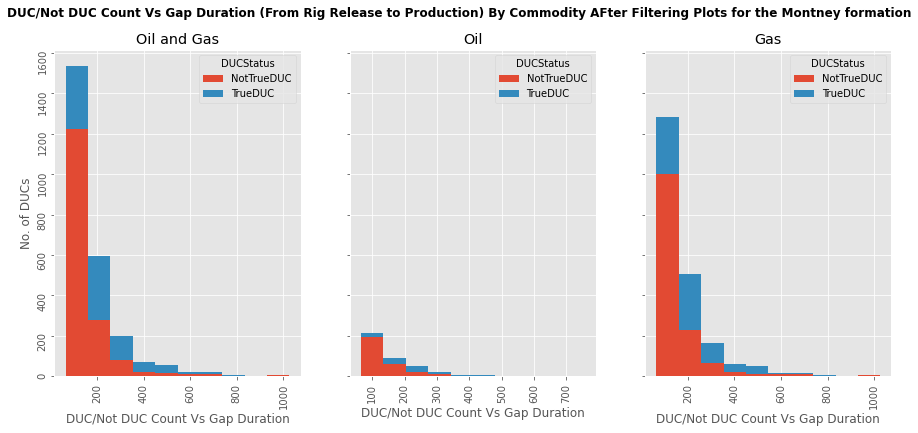

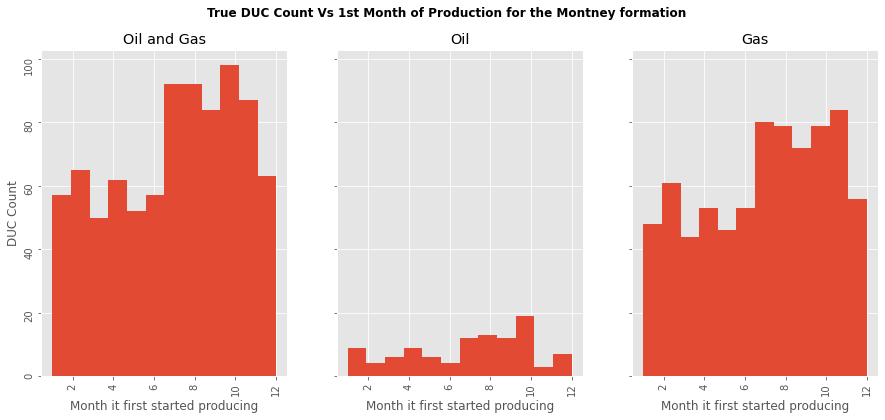

For the Viking formation
True DUC shape: (433, 15)
Not a True DUC shape: (0, 15)


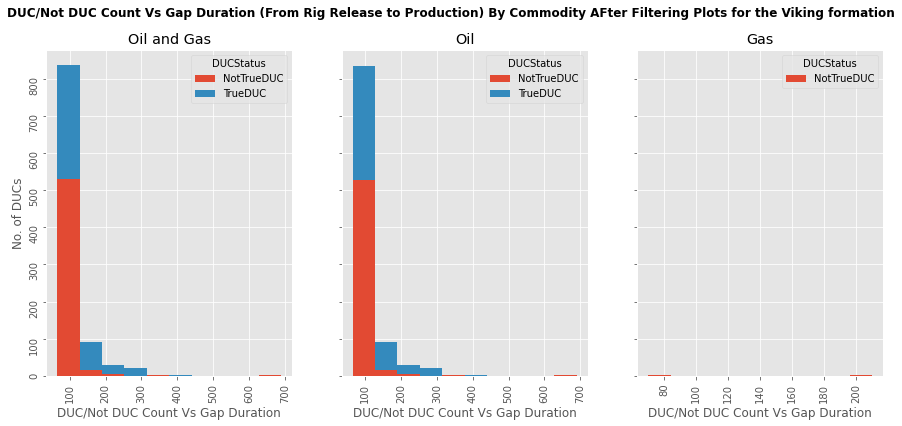

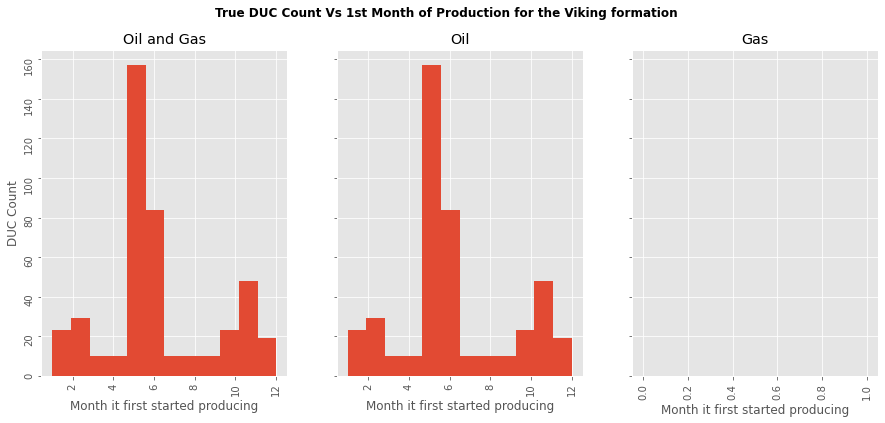

For the Cardium formation
True DUC shape: (64, 15)
Not a True DUC shape: (0, 15)


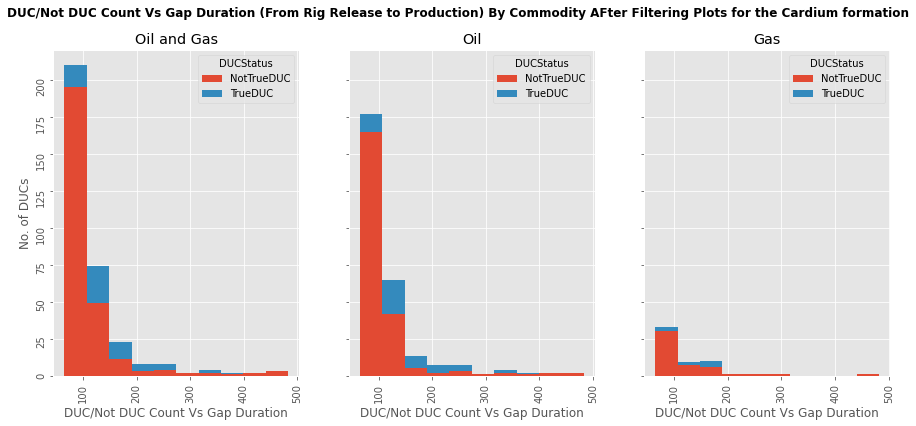

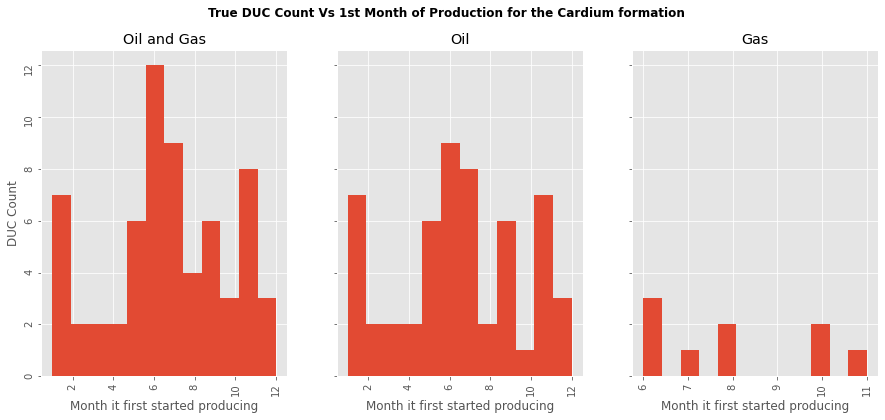

For the Duvernay formation
True DUC shape: (126, 15)
Not a True DUC shape: (0, 15)


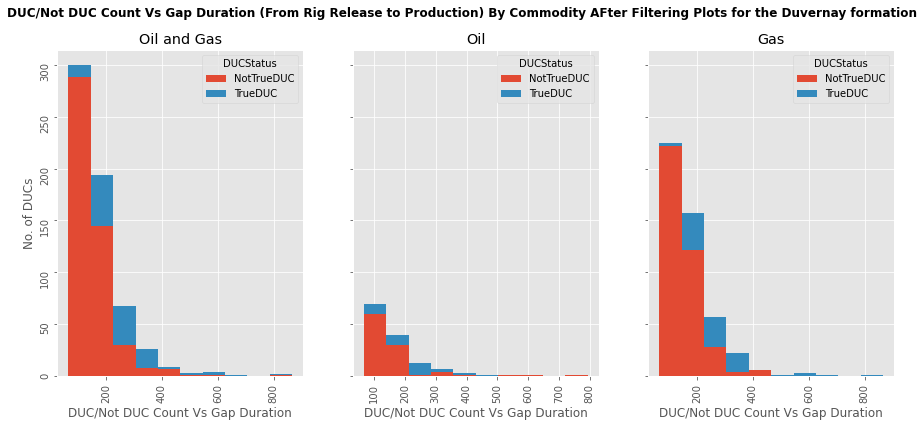

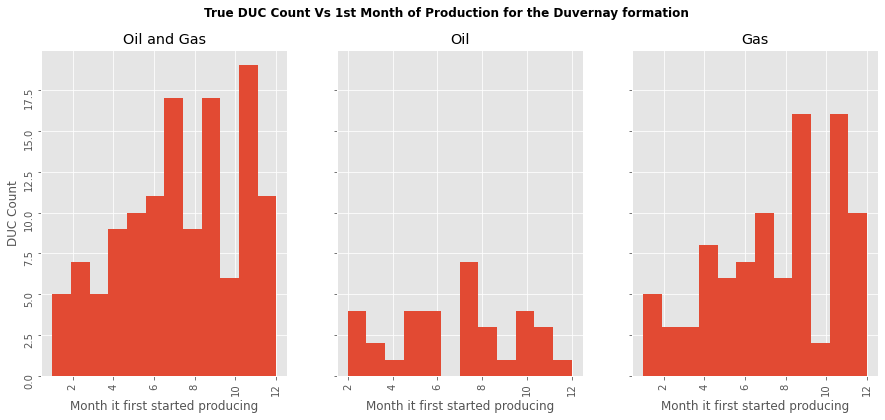

For all formations
True DUC shape: (1482, 15)
Not a True DUC shape: (0, 15)


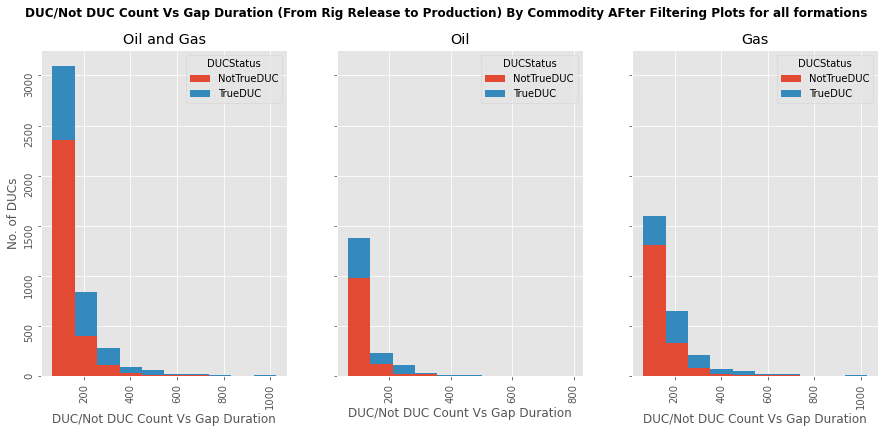

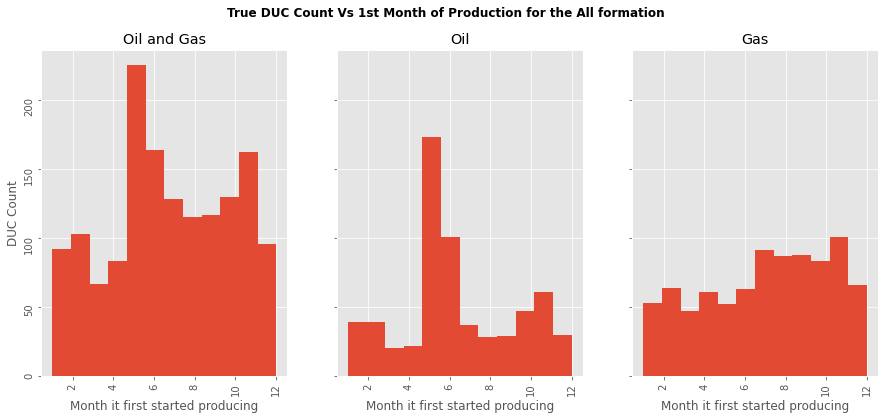

In [35]:
def find_ducs_simple(ref_df):
    """Finds suspected DUCs and makes some plots about their numbers. This will iterate by formation, and then by commodity.
    
    Args:
        ref_df (int): This is the combined dataframe being used
    
    Returns:
        None: It will just display graphs and general results
    """

    ducs_df = ref_df.loc[:,('EPAssetsId', 
                            'Formation',
                            'LicenceDateCount',
                            'Correct Full Prod Date',
                            'CorrectRigReleaseDate',
                            'Adj_Prod_Vs_Rig_Rel_Dif',
                            'FirstPerfDate', 
                            'LastPerfDate',
                            'PerfVsProdDate', 
                            'FirstPerfVsRigRelease', 
                            'LastPerfVsRigRelease', 
                            'LongestPerfGapPeriod',
                            'DUCStatus', 
                            'WellTypeStandardised')].sort_values(by='CorrectRigReleaseDate')

    #ducs_df['first prod year'] = ducs_df['Correct Full Prod Date'].dt.year
    ducs_df['first prod month'] = ducs_df['Correct Full Prod Date'].dt.month

    ducs_df.to_csv('C:\\Users\Jeremy Zhao\Dropbox\Personal\Python\DUC\JeremyFinal.csv')

    for formation in ref_df['Formation'].unique():
        
        ducs_df1 = ducs_df[ducs_df['Formation'] == formation]
        if formation == "All":
            print("For all formations")
        else:
            print("For the",formation,"formation")
        print("True DUC shape:",ducs_df1[ducs_df1['DUCStatus'] == "TrueDUC"].shape)
        print("Not a True DUC shape:",ducs_df1[ducs_df1['DUCStatus'] == "NotTrueDUCShutIn"].shape)
        
        ducs_df_oil = ducs_df1[ducs_df1["WellTypeStandardised"] == "Oil"]
        ducs_df_gas = ducs_df1[ducs_df1["WellTypeStandardised"] == "Gas"]
        ducs_df_oil_pivot = ducs_df_oil.pivot(columns='DUCStatus').Adj_Prod_Vs_Rig_Rel_Dif.astype('timedelta64[D]')
        ducs_df_gas_pivot = ducs_df_gas.pivot(columns="DUCStatus").Adj_Prod_Vs_Rig_Rel_Dif.astype('timedelta64[D]')

        fig, ax = plt.subplots(1,3, figsize=(15,6), sharey=True)

        ducs_df1.pivot(columns='DUCStatus').Adj_Prod_Vs_Rig_Rel_Dif.astype('timedelta64[D]').plot(kind = 'hist', stacked=True, ax=ax[0])
        ducs_df_oil_pivot.plot(kind = 'hist', stacked=True, ax=ax[1])
        ducs_df_gas_pivot.plot(kind = 'hist', stacked=True, ax=ax[2])

        titles1 = ['Oil and Gas', 'Oil', 'Gas']
    
        for i in range(3):
            ax[i].set_ylabel('No. of DUCs')
            ax[i].set_xlabel('DUC/Not DUC Count Vs Gap Duration')
            ax[i].set_title(titles1[i])
            ax[i].tick_params(labelrotation=90)
            #ax[i].get_legend().remove()
    
        if formation == "All":
            fig.suptitle('DUC/Not DUC Count Vs Gap Duration (From Rig Release to Production) By Commodity AFter Filtering Plots for all formations',
                     fontweight='bold')
        else:
            fig.suptitle('DUC/Not DUC Count Vs Gap Duration (From Rig Release to Production) By Commodity AFter Filtering Plots for the '+formation+' formation',
                     fontweight='bold')
            
        plt.show()
    
        fig, ax = plt.subplots(1,3, figsize=(15,6), sharey=True)
    
        ducs_df1[ducs_df1['DUCStatus'] == 'TrueDUC']['first prod month'].plot(kind='hist', bins=12, ax=ax[0])
        ducs_df_oil[ducs_df_oil['DUCStatus'] == 'TrueDUC']['first prod month'].plot(kind = 'hist', bins=12, ax=ax[1])
        ducs_df_gas[ducs_df_gas['DUCStatus'] == 'TrueDUC']['first prod month'].plot(kind = 'hist', bins=12, ax=ax[2])
    
        for i in range(3):
            ax[i].set_ylabel('DUC Count')
            ax[i].set_xlabel('Month it first started producing')
            ax[i].set_title(titles1[i])
            ax[i].tick_params(labelrotation=90)
            #ax[i].get_legend().remove()
    
        plt.xticks(rotation = 90)
        fig.suptitle('True DUC Count Vs 1st Month of Production for the '+formation+' formation',fontweight='bold')
        plt.show()

    return None

find_ducs1 = find_ducs_simple(final_df_mod1)
find_ducs2 = find_ducs_simple(final_df_mod1_graph)

<h1>8C. Analysis: Finding types of suspected DUCs and general plots (DETAILED)</h1>

For the Montney formation
True DUC shape: (547, 15)
Shut-In shape: (516, 15)
True DUC with long production gap shape: (225, 15)
Completed Well with long production gap shape: (447, 15)
Completed Well with long completion gap shape (469, 15)
Delayed Well (497, 15)


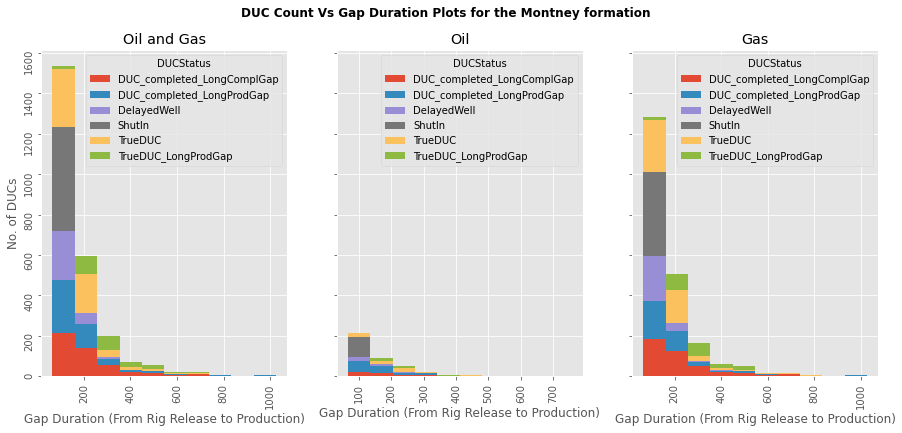

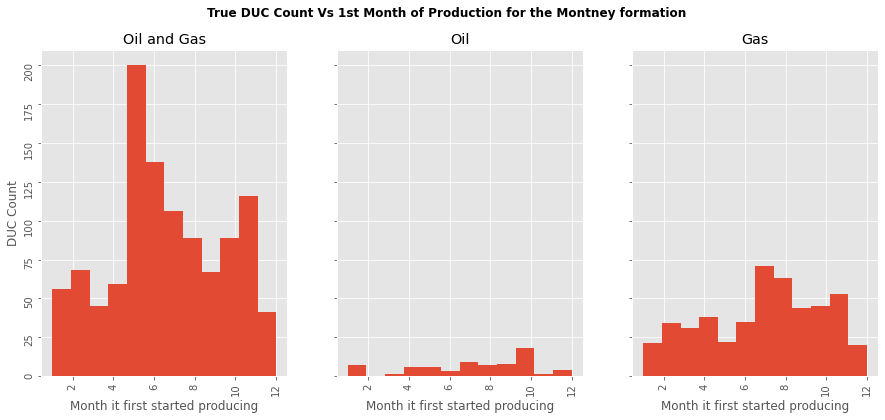

For the Viking formation
True DUC shape: (425, 15)
Shut-In shape: (410, 15)
True DUC with long production gap shape: (8, 15)
Completed Well with long production gap shape: (102, 15)
Completed Well with long completion gap shape (17, 15)
Delayed Well (497, 15)


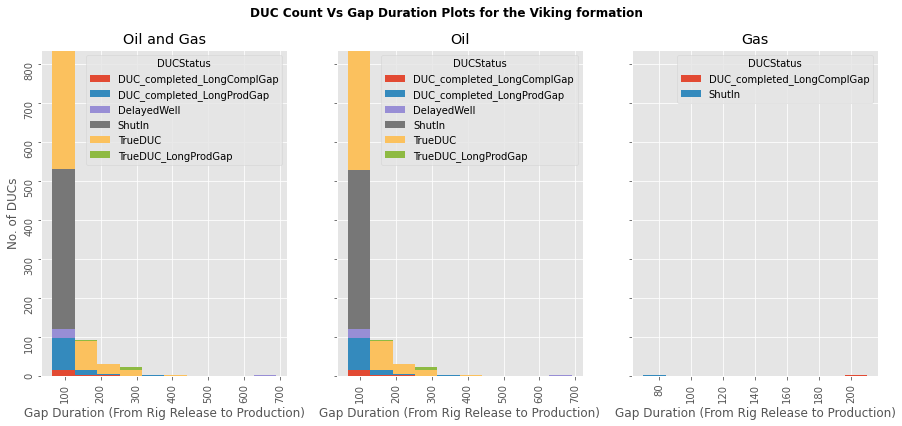

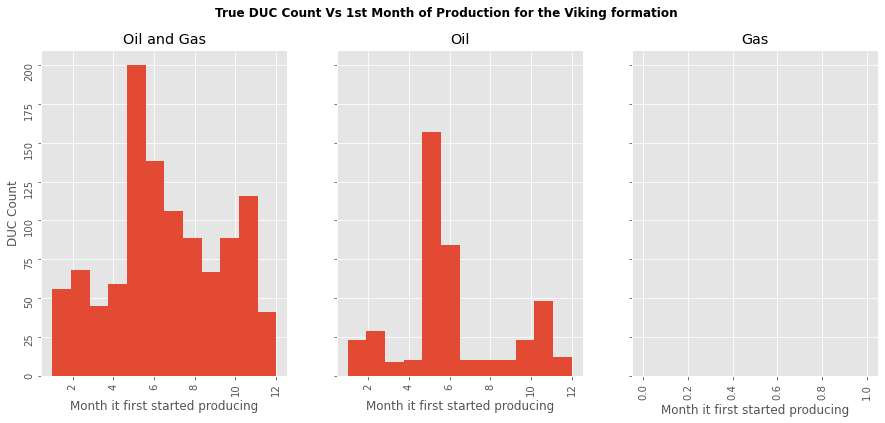

For the Cardium formation
True DUC shape: (57, 15)
Shut-In shape: (135, 15)
True DUC with long production gap shape: (6, 15)
Completed Well with long production gap shape: (92, 15)
Completed Well with long completion gap shape (38, 15)
Delayed Well (497, 15)


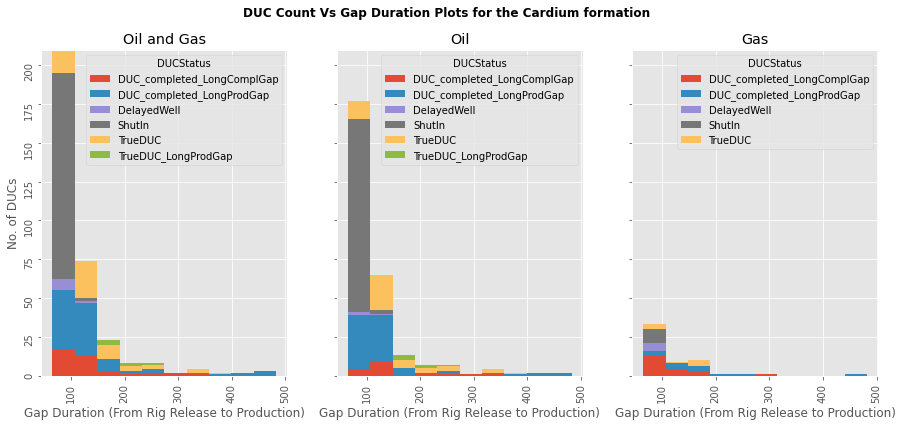

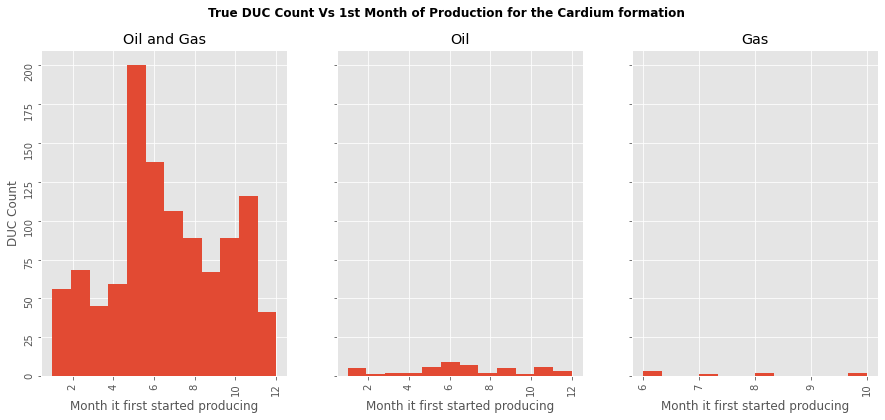

For the Duvernay formation
True DUC shape: (45, 15)
Shut-In shape: (124, 15)
True DUC with long production gap shape: (63, 15)
Completed Well with long production gap shape: (126, 15)
Completed Well with long completion gap shape (87, 15)
Delayed Well (497, 15)


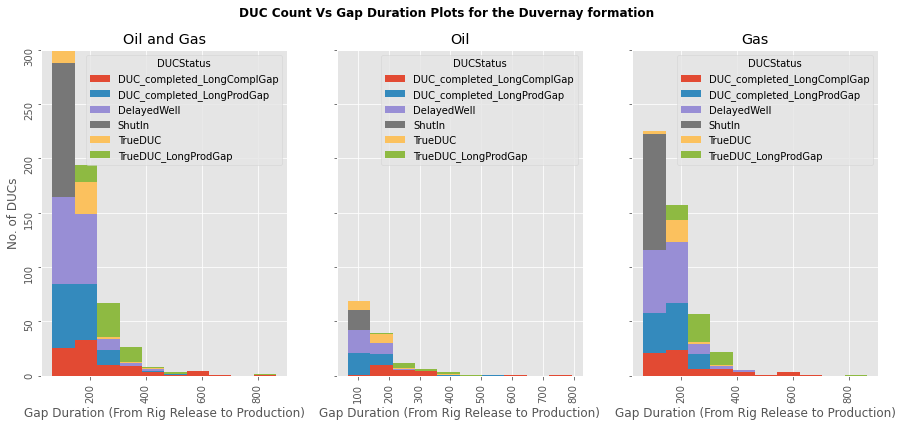

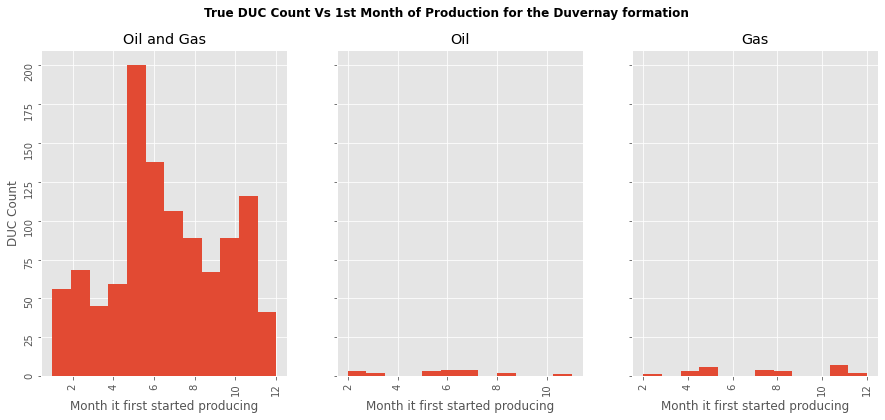

For all formations
True DUC shape: (1074, 15)
Shut-In shape: (1185, 15)
True DUC with long production gap shape: (302, 15)
Completed Well with long production gap shape: (767, 15)
Completed Well with long completion gap shape (611, 15)
Delayed Well (497, 15)


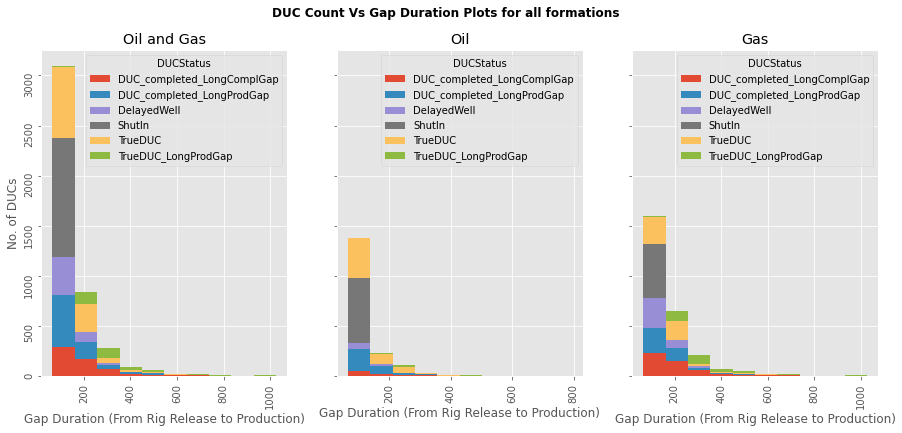

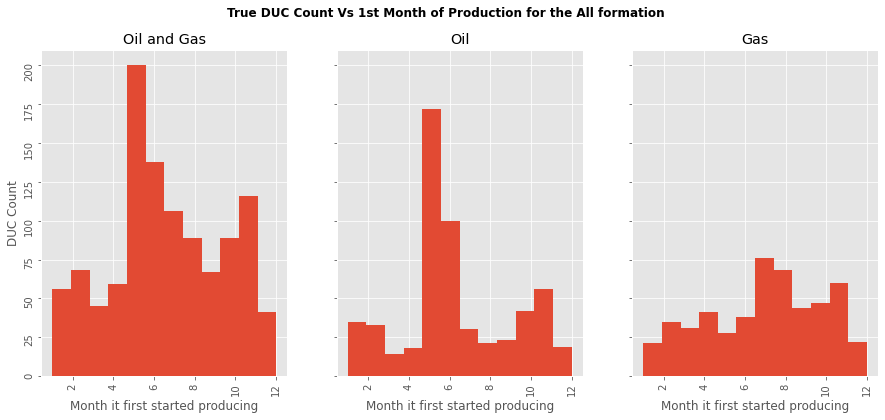

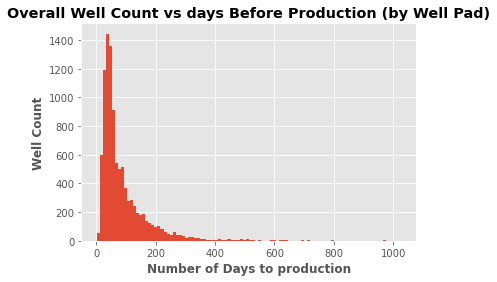

In [36]:
def find_ducs(ref_df):
    """Finds suspected DUCs and makes some plots about their numbers. This will iterate by formation, and then by commodity.
    
    Args:
        ref_df (int): This is the combined dataframe being used
    
    Returns:
        None: It will just display graphs and general results
    """

    ducs_df = ref_df.loc[:,('EPAssetsId', 
                            'Formation',
                            'LicenceDateCount',
                            'Correct Full Prod Date',
                            'CorrectRigReleaseDate',
                            'Adj_Prod_Vs_Rig_Rel_Dif',
                            'FirstPerfDate', 
                            'LastPerfDate',
                            'PerfVsProdDate', 
                            'FirstPerfVsRigRelease', 
                            'LastPerfVsRigRelease', 
                            'LongestPerfGapPeriod',
                            'DUCStatus', 
                            'WellTypeStandardised')].sort_values(by='CorrectRigReleaseDate')

    #ducs_df['first prod year'] = ducs_df['Correct Full Prod Date'].dt.year
    ducs_df['first prod month'] = ducs_df['Correct Full Prod Date'].dt.month

    ducs_df.to_csv('C:\\Users\Jeremy Zhao\Dropbox\Personal\Python\DUC\JeremyFinal.csv')

    for formation in ref_df['Formation'].unique():
        
        ducs_df1 = ducs_df[ducs_df['Formation'] == formation]
        if formation == "All":
            print("For all formations")
        else:
            print("For the",formation,"formation")
        print("True DUC shape:",ducs_df1[ducs_df1['DUCStatus'] == "TrueDUC"].shape)
        print("Shut-In shape:",ducs_df1[ducs_df1['DUCStatus'] == "ShutIn"].shape)
        print("True DUC with long production gap shape:",ducs_df1[ducs_df1['DUCStatus'] == "TrueDUC_LongProdGap"].shape)
        print("Completed Well with long production gap shape:",ducs_df1[ducs_df1['DUCStatus'] == "DUC_completed_LongProdGap"].shape)
        print("Completed Well with long completion gap shape",ducs_df1[ducs_df1['DUCStatus'] == "DUC_completed_LongComplGap"].shape)
        print("Delayed Well",ducs_df[ducs_df['DUCStatus'] == "DelayedWell"].shape)

        ducs_df_oil = ducs_df1[ducs_df1["WellTypeStandardised"] == "Oil"]
        ducs_df_gas = ducs_df1[ducs_df1["WellTypeStandardised"] == "Gas"]
        ducs_df_oil_pivot = ducs_df_oil.pivot(columns='DUCStatus').Adj_Prod_Vs_Rig_Rel_Dif.astype('timedelta64[D]')
        ducs_df_gas_pivot = ducs_df_gas.pivot(columns="DUCStatus").Adj_Prod_Vs_Rig_Rel_Dif.astype('timedelta64[D]')

        fig, ax = plt.subplots(1,3, figsize=(15,6), sharey=True)

        ducs_df1.pivot(columns='DUCStatus').Adj_Prod_Vs_Rig_Rel_Dif.astype('timedelta64[D]').plot(kind = 'hist', stacked=True, ax=ax[0])
        ducs_df_oil_pivot.plot(kind = 'hist', stacked=True, ax=ax[1])
        ducs_df_gas_pivot.plot(kind = 'hist', stacked=True, ax=ax[2])

        titles1 = ['Oil and Gas', 'Oil', 'Gas']
    
        for i in range(3):
            ax[i].set_ylabel('No. of DUCs')
            ax[i].set_xlabel('Gap Duration (From Rig Release to Production)')
            ax[i].set_title(titles1[i])
            ax[i].tick_params(labelrotation=90)
            #ax[i].get_legend().remove()
    
        if formation == "All":
                fig.suptitle('DUC Count Vs Gap Duration Plots for all formations', fontweight='bold')
        else:
            fig.suptitle('DUC Count Vs Gap Duration Plots for the '+formation+' formation',fontweight='bold')
            
        plt.show()
    
        fig, ax = plt.subplots(1,3, figsize=(15,6), sharey=True)
    
        ducs_df[ducs_df['DUCStatus'] == 'TrueDUC']['first prod month'].plot(kind='hist', bins=12, ax=ax[0])
        ducs_df_oil[ducs_df_oil['DUCStatus'] == 'TrueDUC']['first prod month'].plot(kind = 'hist', bins=12, ax=ax[1])
        ducs_df_gas[ducs_df_gas['DUCStatus'] == 'TrueDUC']['first prod month'].plot(kind = 'hist', bins=12, ax=ax[2])
    
        for i in range(3):
            ax[i].set_ylabel('DUC Count')
            ax[i].set_xlabel('Month it first started producing')
            ax[i].set_title(titles1[i])
            ax[i].tick_params(labelrotation=90)
            #ax[i].get_legend().remove()
    
        plt.xticks(rotation = 90)
        fig.suptitle('True DUC Count Vs 1st Month of Production for the '+formation+' formation',fontweight='bold')
        plt.show()

    return None

find_ducs1 = find_ducs(final_df_mod)
find_ducs2 = find_ducs(final_df_mod_graph)

final_df['Adj_Prod_Vs_Rig_Rel_Dif'].astype('timedelta64[D]').plot.hist(bins = 100)

plt.title ('Overall Well Count vs days Before Production (by Well Pad)',fontweight='bold')
plt.xlabel ('Number of Days to production',fontweight='bold')
plt.ylabel ('Well Count',fontweight='bold')
plt.show()

<h1>8D. True DUC Count Vs Time (Simplified for Datathon)</h1>

In [37]:
# Make special time dataframe for graphing
data_df = pd.date_range('01/2015','02/2020',freq='M').to_period('m')
data_df = pd.DataFrame(data_df)
data_df.rename(columns={0: "Date"}, inplace=True)
data_df['Date'] = data_df['Date'].values.astype(str)

In [38]:
# Rig Release DataFrame

rig_df = pd.DataFrame(final_df['CorrectRigReleaseDate'])
rig_df['RigReleasePeriod'] = rig_df['CorrectRigReleaseDate'].dt.strftime('%Y-%m')
rig_df = rig_df.groupby(['RigReleasePeriod']).agg({'CorrectRigReleaseDate': 'count'}).rename(columns={'CorrectRigReleaseDate':'WellsDrilled'}).reset_index()
rig_df['RigReleasePeriod'] = pd.to_datetime(rig_df['RigReleasePeriod'])

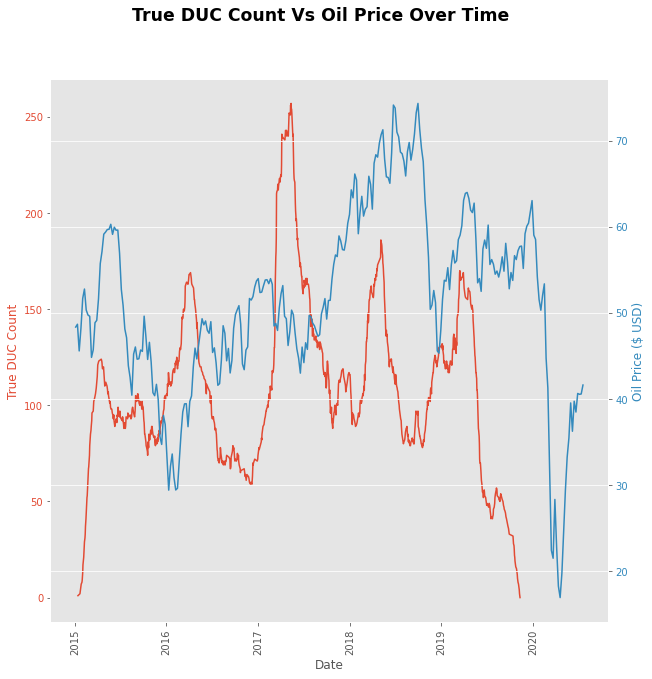

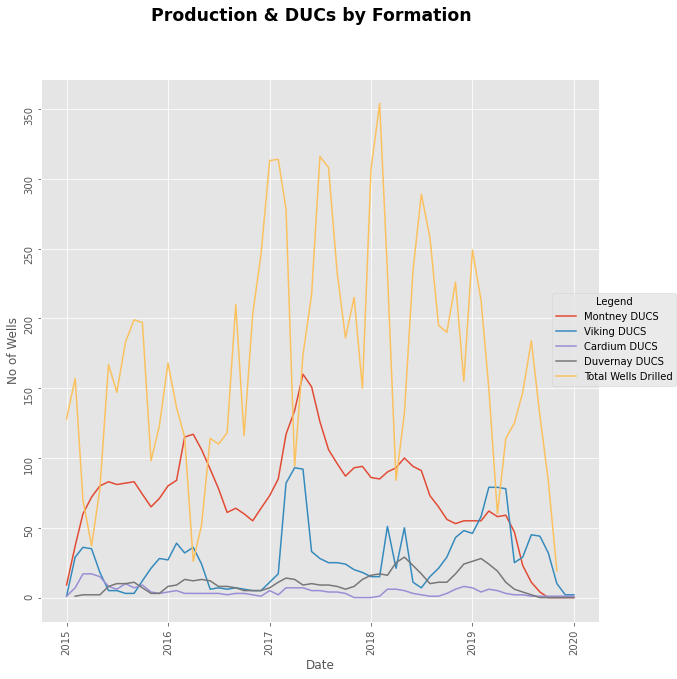

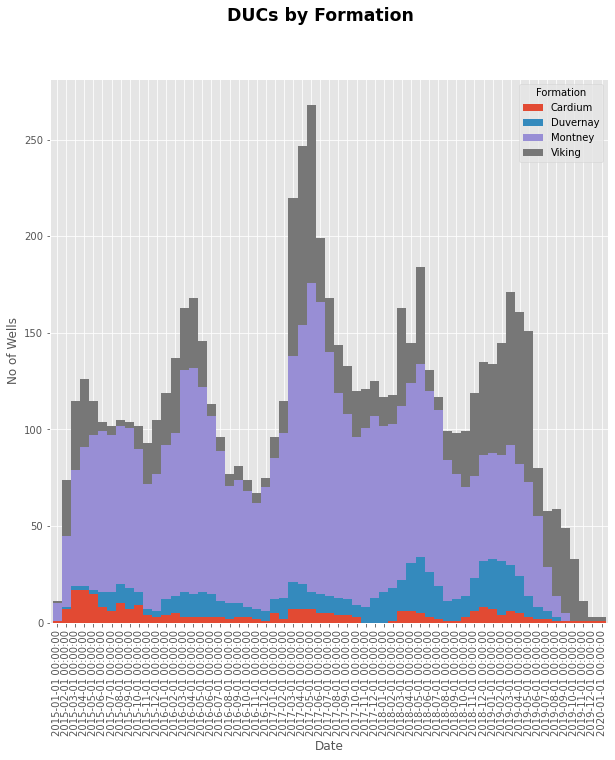

In [39]:
duc_trend_init = final_df_mod1.loc[:,('EPAssetsId','Adj_Prod_Vs_Rig_Rel_Dif',
                        'FirstPerfDate', 
                        'CorrectRigReleaseDate','DUCStatus')].sort_values(by='Adj_Prod_Vs_Rig_Rel_Dif')
duc_trend = duc_trend_init.drop(columns=['Adj_Prod_Vs_Rig_Rel_Dif'])
duc_trend = duc_trend[duc_trend['DUCStatus'] == "TrueDUC"]
duc_trend = duc_trend.drop(columns=['DUCStatus'])

duc_trend = duc_trend.melt(id_vars=['EPAssetsId'], var_name ='ProdOrDUC', value_name ='Date')

duc_trend.loc[(duc_trend['ProdOrDUC'] == 'FirstPerfDate' ), 'SumOfWells'] = -1
duc_trend.loc[(duc_trend['ProdOrDUC'] == 'CorrectRigReleaseDate' ), 'SumOfWells'] = 1

duc_trend = duc_trend.groupby('Date', as_index=False).SumOfWells.sum()

duc_trend['SumOfWells'] = duc_trend['SumOfWells'].cumsum()

fig, ax1 = plt.subplots(figsize=(10,10))

ax1.set_xlabel('Date')
ax1.set_ylabel('True DUC Count', color='#E24A33')
ax1.plot(duc_trend['Date'],duc_trend['SumOfWells'], color='#E24A33')
ax1.tick_params(axis='y', labelcolor='#E24A33')
ax1.tick_params(axis='x', labelrotation=90)
#ax1.yaxis.set_ticks(np.arange(0, 300, 4))
#ax1.set_facecolor('white')
ax1.grid(False)
ax2 = ax1.twinx()

ax2.set_ylabel('Oil Price ($ USD)', color='#348ABD')
ax2.plot(oil['Date'],oil['Price'], color='#348ABD')   
ax2.tick_params(axis='y', labelcolor='#348ABD')

fig.suptitle("True DUC Count Vs Oil Price Over Time", fontsize="xx-large", fontweight="bold")
plt.show() 

# Production and DUCs by Formation Chart

fig, ax1 = plt.subplots(figsize=(10,10))

labels1 = []
temp_df = pd.DataFrame()
for formation in final_df_mod1['Formation'].unique():
    duc_trend_mod = final_df_mod1[final_df_mod1['Formation'] == formation]
    duc_trend_mod = duc_trend_mod.loc[:,('EPAssetsId','Adj_Prod_Vs_Rig_Rel_Dif',
                        'FirstPerfDate', 
                        'CorrectRigReleaseDate','DUCStatus')].sort_values(by='Adj_Prod_Vs_Rig_Rel_Dif')
    duc_trend_mod = duc_trend_mod.drop(columns=['Adj_Prod_Vs_Rig_Rel_Dif'])
    duc_trend_mod = duc_trend_mod[duc_trend_mod['DUCStatus'] == "TrueDUC"]
    duc_trend_mod = duc_trend_mod.drop(columns=['DUCStatus'])

    duc_trend_mod = duc_trend_mod.melt(id_vars=['EPAssetsId'], var_name ='ProdOrDUC', value_name ='Date')

    duc_trend_mod.loc[(duc_trend_mod['ProdOrDUC'] == 'FirstPerfDate' ), 'SumOfWells'] = -1
    duc_trend_mod.loc[(duc_trend_mod['ProdOrDUC'] == 'CorrectRigReleaseDate' ), 'SumOfWells'] = 1

    duc_trend_mod = duc_trend_mod.groupby('Date', as_index=False).SumOfWells.sum()

    duc_trend_mod['SumOfWells'] = duc_trend_mod['SumOfWells'].cumsum()
    duc_trend_mod = duc_trend_mod.reset_index()
    duc_trend_mod['Date'] = pd.to_datetime(duc_trend_mod['Date'])
    duc_trend_mod['Date'] = duc_trend_mod['Date'].dt.strftime('%Y-%m')

    duc_trend_mod.drop(columns=['index'],inplace =True,axis = 1)
    duc_trend_mod['SumOfWells'] = duc_trend_mod['SumOfWells'].astype(int)
    duc_trend_mod['Date'] = duc_trend_mod['Date'].values.astype(str)
 

    duc_over_time = pd.merge(duc_trend_mod, data_df, on="Date", how="outer")
    duc_over_time = duc_over_time.sort_values(by="Date")
    duc_over_time['SumOfWells'] = duc_over_time['SumOfWells'].ffill()
    duc_over_time['Date'] = pd.to_datetime(duc_over_time['Date'])
    duc_over_time['Formation'] = formation
    duc_over_time_chart = duc_over_time.groupby('Date', as_index=False).SumOfWells.max()
    
    temp_df = temp_df.append(duc_over_time, ignore_index=True)
    #ax1.bar(duc_over_time['Date'], duc_over_time['SumOfWells'].values.flatten(), width=15)
    ax1.plot(duc_over_time_chart['Date'], duc_over_time_chart['SumOfWells'].values.flatten() )
    ax1.tick_params(labelrotation=90)
    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax1.xaxis.set_minor_formatter(mdates.DateFormatter('%m'))
    
    labels1.append(formation+" DUCS")

ax1.plot(rig_df['RigReleasePeriod'], rig_df['WellsDrilled'])
ax1.set_ylabel('No of Wells')
ax1.set_xlabel('Date')

labels1.append("Total Wells Drilled")
fig.legend([ax1],  
           labels=labels1,  
           loc="center right",   
           borderaxespad=0.1,    
           title="Legend"  
           )

fig.suptitle("Production & DUCs by Formation", fontsize="xx-large", fontweight="bold")
plt.show()

temp_df = temp_df.groupby(["Date", "Formation"]).agg({'SumOfWells': 'max'}).reset_index()

#temp_df['Date'] = temp_df['Date'].dt.strftime('%Y-%m')
#temp_df['Date'] = mdates.date2num(temp_df.Date.dt.to_pydatetime())

fig, ax1 = plt.subplots(figsize=(10,10))

#ax1.xaxis_date()
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#ax1.xaxis.set_minor_formatter(mdates.DateFormatter('%m'))

#rig_df.plot(kind="line", x='RigReleasePeriod', y='WellsDrilled', color="#348ABD", ax=ax1)
ax1.set_ylabel('No of Wells')
ax1.set_xlabel('Date')

temp_df.pivot(index="Date", columns='Formation', values="SumOfWells").plot(kind="bar", stacked=True, width=1, ax=ax1)
fig.suptitle("DUCs by Formation", fontsize="xx-large", fontweight="bold")
plt.show()
#####

<h1>8E. DUC vs Non-DUC Well BOE Production Consideration</h1>

Montney
DUC Well Average Production is  534.5353721958649  BOE per day
Non DUC Well Average Production is  550.2618790081057  BOE per day
Viking
DUC Well Average Production is  33.959717924510144  BOE per day
Non DUC Well Average Production is  35.95363972119459  BOE per day
Cardium
DUC Well Average Production is  135.85514993337262  BOE per day
Non DUC Well Average Production is  152.84240427768432  BOE per day
Duvernay
DUC Well Average Production is  355.31780031217016  BOE per day
Non DUC Well Average Production is  254.1722990831141  BOE per day


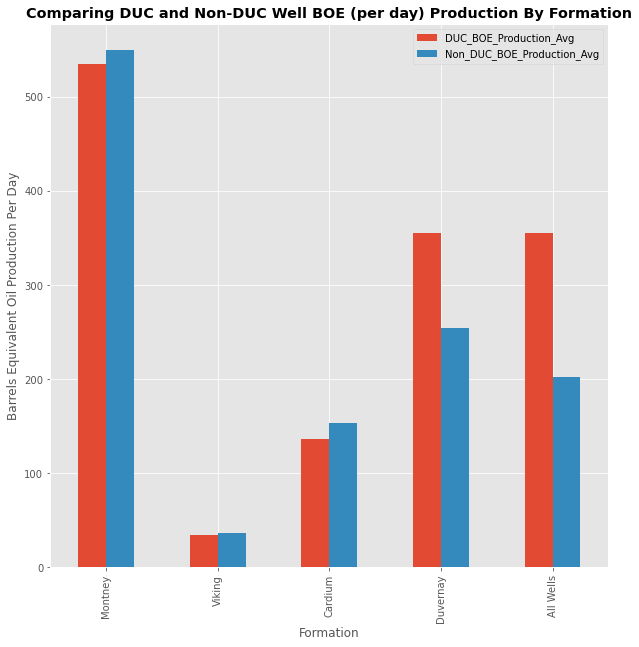

In [40]:
well_compare_duc_df = pd.DataFrame(columns=['Formation', 'DUC_BOE_Production_Avg', 'Non_DUC_BOE_Production_Avg'])

unique_duc_list = final_df_mod1[final_df_mod1['DUCStatus'] == "TrueDUC"]['EPAssetsId'].unique()

for formation in final_df_mod1['Formation'].unique():

    well_prod_compare_df = final_df_mod1[(final_df_mod1['DUCStatus'] == "TrueDUC") & (final_df_mod1['Formation'] == formation)][['EPAssetsId','AvgBOEProdPerDay']]

    print(formation)
    duc_prod_avg = well_prod_compare_df['AvgBOEProdPerDay'].mean()
    print("DUC Well Average Production is ",duc_prod_avg," BOE per day")
    well_prod_compare_df2 = final_df[(~final_df['EPAssetsId'].isin(unique_duc_list)) & (final_df['Formation'] == formation) ][['EPAssetsId','AvgBOEProdPerDay']]

    non_duc_prod_avg = well_prod_compare_df2['AvgBOEProdPerDay'].mean()
    print("Non DUC Well Average Production is ",non_duc_prod_avg," BOE per day")
    well_compare_duc_df = well_compare_duc_df.append({'Formation': formation, 'DUC_BOE_Production_Avg': duc_prod_avg, 'Non_DUC_BOE_Production_Avg': non_duc_prod_avg}, ignore_index=True)

all_ducs_prod = final_df_mod1[final_df_mod1['DUCStatus'] == "TrueDUC"][['EPAssetsId','AvgBOEProdPerDay']]
all_ducs_prod_avg = all_ducs_prod['AvgBOEProdPerDay'].mean()
all_non_ducs_prod = final_df[~final_df['EPAssetsId'].isin(unique_duc_list) ][['EPAssetsId','AvgBOEProdPerDay']]

all_non_ducs_prod_avg = all_non_ducs_prod['AvgBOEProdPerDay'].mean()

well_compare_duc_df = well_compare_duc_df.append({'Formation': 'All Wells', 'DUC_BOE_Production_Avg': all_ducs_prod_avg, 'Non_DUC_BOE_Production_Avg': all_non_ducs_prod_avg}, ignore_index=True)

well_compare_duc_df.plot.bar(x="Formation", figsize=(10,10))

plt.legend()
plt.title ('Comparing DUC and Non-DUC Well BOE (per day) Production By Formation',fontweight='bold')
plt.ylabel('Barrels Equivalent Oil Production Per Day')
plt.xlabel('Formation')

plt.show()

<h1>8F. DUCs by Operator</h1>

,CurrentOperator,DUCStatus
5,Baytex Energy Ltd.,212
1,Arc Resources Ltd.,105
59,Seven Generations Energy Ltd.,104
48,Petronas Energy Canada Ltd.,103
72,Tourmaline Oil Corp.,93
...,...,...
62,Sinopec Daylight Energy Ltd.,1
16,Cona Resources Ltd.,1
55,Rife Resources Ltd.,1
21,Dienerian Resources Inc.,1


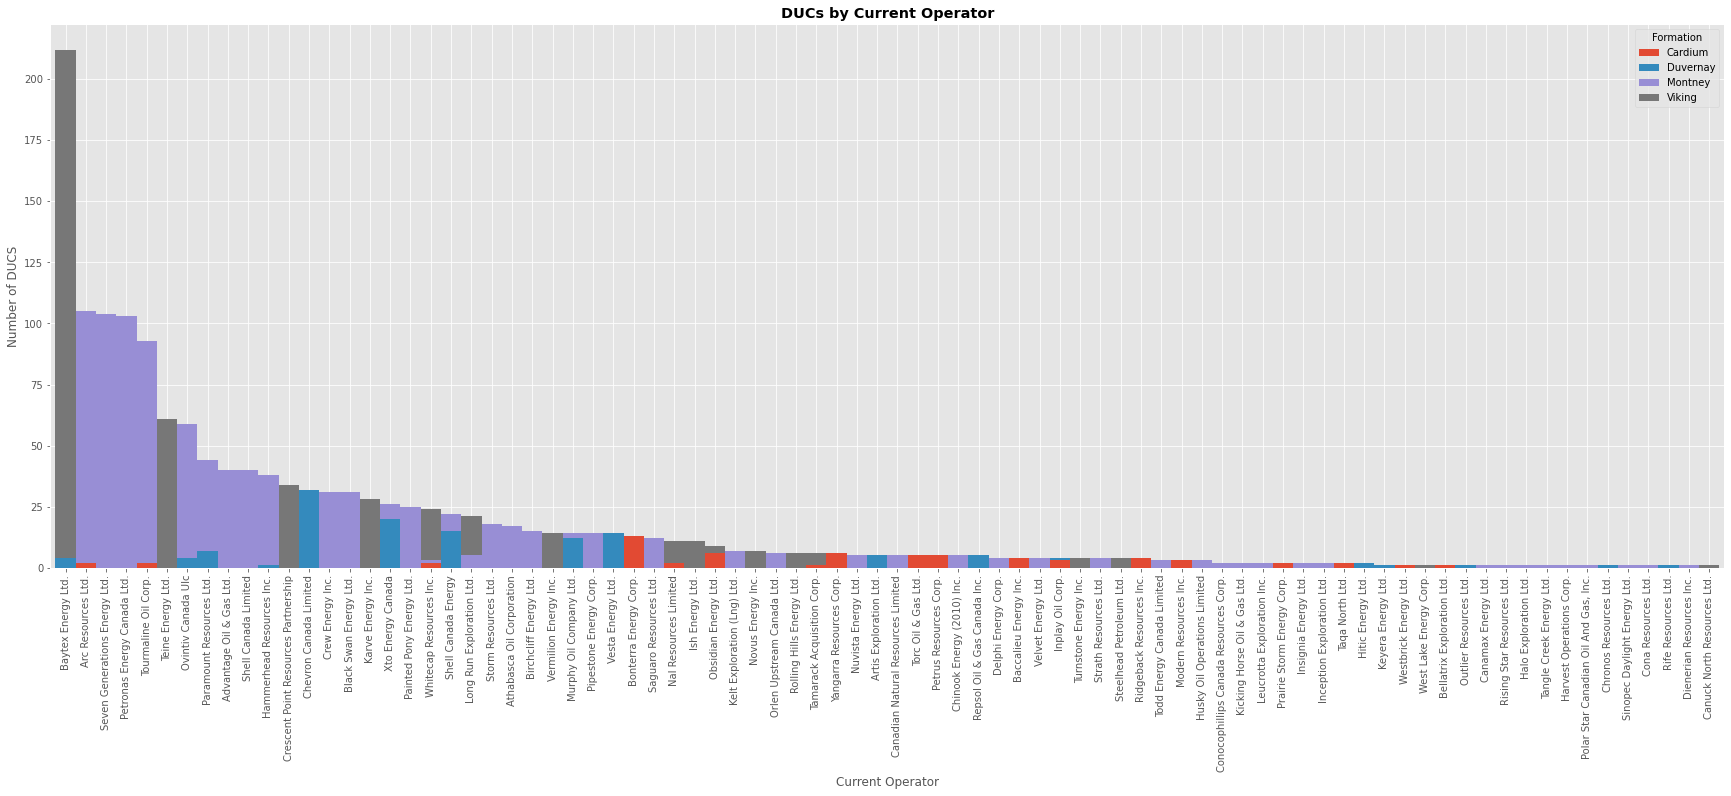

In [41]:
ops_duc_df = final_df_mod1[["Formation", "CurrentOperator", "DUCStatus"]]
ops_duc_df = ops_duc_df[ops_duc_df['DUCStatus'] == "TrueDUC"]

ops_duc_df1 = ops_duc_df.groupby(["Formation","CurrentOperator"]).agg({"CurrentOperator": "count"}).rename(columns={'CurrentOperator':'Count'}).reset_index().sort_values(by="Count", ascending=False)
ops_duc_df2 = ops_duc_df.groupby(["CurrentOperator"]).agg({"DUCStatus": "count"}).reset_index().sort_values(by="DUCStatus", ascending=False)

order_list = ops_duc_df2['CurrentOperator'].tolist()
display(ops_duc_df2)
ops_duc_df1.pivot(index="CurrentOperator", columns='Formation', values="Count").reindex(order_list).plot(kind="bar", stacked=True, width=1, figsize=(30,10))
plt.title ('DUCs by Current Operator',fontweight='bold')
plt.ylabel('Number of DUCS')
plt.xlabel('Current Operator')
plt.show()

<h1>Statistics</h1>

<b>Average Time from Spud to Sales (Filtered out Anything Beyond 180 Days to get a better average)</b>

In [42]:
def spud_to_sales_avg(df, start_lic, end_lic):
    """Generates the average spud to sales time 
    by iterating through the number of licenses shared in the same surface LSD.
    
    Args:
        df (str): This is the Well Production DataFrame being used
        start_lic (int): This is starting number of licenses shared.
        end_lic (int): This is the end number of licenses shared.
    
    Returns:


    """
    
    for license in range(start_lic, end_lic+1):
        lic_filter = df['LicenceDateCount'] == license
        temp_df = df[lic_filter]
        temp_df = temp_df[temp_df['SpudToSales'] <= timedelta(days=180)]
        print("The mean time between Spud to Sales for",license,"licence is",temp_df['SpudToSales'].mean())
    return None

spud_to_sales_avg(final_df, 1, 5)

final_df[final_df['LicenceDateCount'] == 2]['SpudToSales'].mean()

The mean time between Spud to Sales for 1 licence is 66 days 05:10:28.456104
The mean time between Spud to Sales for 2 licence is 70 days 16:11:48.808290
The mean time between Spud to Sales for 3 licence is 76 days 02:01:34.426229
The mean time between Spud to Sales for 4 licence is 95 days 05:44:15
The mean time between Spud to Sales for 5 licence is 111 days 05:18:23.517587


Timedelta('90 days 02:48:12.501973')

<b>Average Time from Last Completion Date to Sales (Filtered out Anything Beyond 180 Days to get a better average)</b>

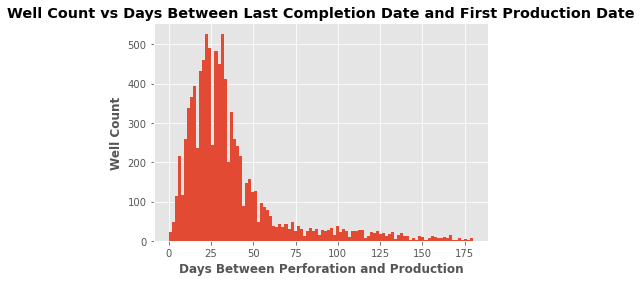

The mean time between Last Completion Date to Sales is 36 days 18:56:23.132530


In [43]:
avg_perf_to_prod_df = final_df[final_df['PerfVsProdDate'] >= timedelta(days=0)]
avg_perf_to_prod_df[avg_perf_to_prod_df['PerfVsProdDate'] <= timedelta(days=180)]['PerfVsProdDate'].astype('timedelta64[D]').plot.hist(bins = 100)

plt.title ('Well Count vs Days Between Last Completion Date and First Production Date',fontweight='bold')
plt.xlabel ('Days Between Perforation and Production',fontweight='bold')
plt.ylabel ('Well Count',fontweight='bold')
plt.show()

print("The mean time between Last Completion Date to Sales is",avg_perf_to_prod_df[avg_perf_to_prod_df['PerfVsProdDate'] <= timedelta(days=180)]['PerfVsProdDate'].mean())

<b>Average Time from Rig Release to Perforation (Filtered out Anything Beyond 180 Days to get a better average)</b>

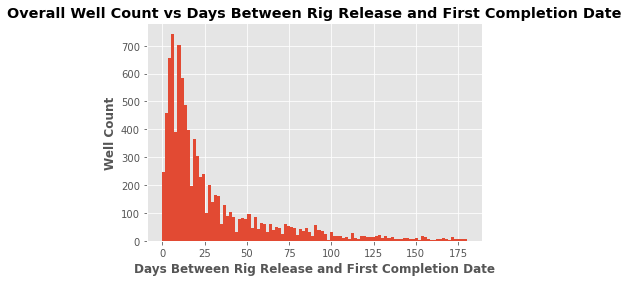

The mean time between Rig Release and First Completion Date for all the wells is  29 days 11:24:57.365853
The mean time between Rig Release and First Completion Date for the Montney formation is  45 days 17:33:27.920792
The mean time between Rig Release and First Completion Date for the Viking formation is  20 days 11:45:29.383313
The mean time between Rig Release and First Completion Date for the Cardium formation is  22 days 10:34:22.461220
The mean time between Rig Release and First Completion Date for the Duvernay formation is  41 days 21:12:58.207381


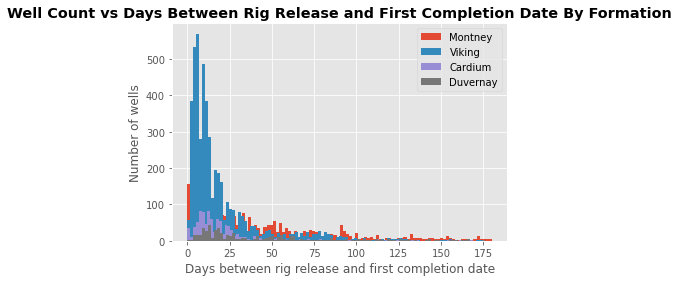

In [44]:
avg_rig_to_perf_df = final_df[final_df['FirstPerfVsRigRelease'] >= timedelta(days=0)]
avg_rig_to_perf_df[avg_rig_to_perf_df['FirstPerfVsRigRelease'] <= timedelta(days=180)]['FirstPerfVsRigRelease'].astype('timedelta64[D]').plot.hist(bins = 100)

plt.title ('Overall Well Count vs Days Between Rig Release and First Completion Date',fontweight='bold')
plt.xlabel ('Days Between Rig Release and First Completion Date',fontweight='bold')
plt.ylabel ('Well Count',fontweight='bold')
plt.show()

print("The mean time between Rig Release and First Completion Date for all the wells is ",avg_rig_to_perf_df[avg_rig_to_perf_df['FirstPerfVsRigRelease'] <= timedelta(days=180)]['FirstPerfVsRigRelease'].mean())

temp_label_hold =[]
for formation in avg_rig_to_perf_df['Formation'].unique():
    temp_df_holder = avg_rig_to_perf_df[avg_rig_to_perf_df['FirstPerfVsRigRelease'] <= timedelta(days=180)]
    temp_df_holder = temp_df_holder[temp_df_holder["Formation"] == formation]
    temp_df_holder['FirstPerfVsRigRelease'].astype('timedelta64[D]').plot.hist(bins = 100)
    temp_label_hold.append(formation)
    
    print("The mean time between Rig Release and First Completion Date for the "+formation+" formation is ",temp_df_holder['FirstPerfVsRigRelease'].mean())

plt.legend(labels=temp_label_hold)
plt.title ('Well Count vs Days Between Rig Release and First Completion Date By Formation',fontweight='bold')
plt.ylabel('Number of wells')
plt.xlabel('Days between rig release and first completion date')
plt.show()

<b>Overall Wells Drilled by Formation</b>

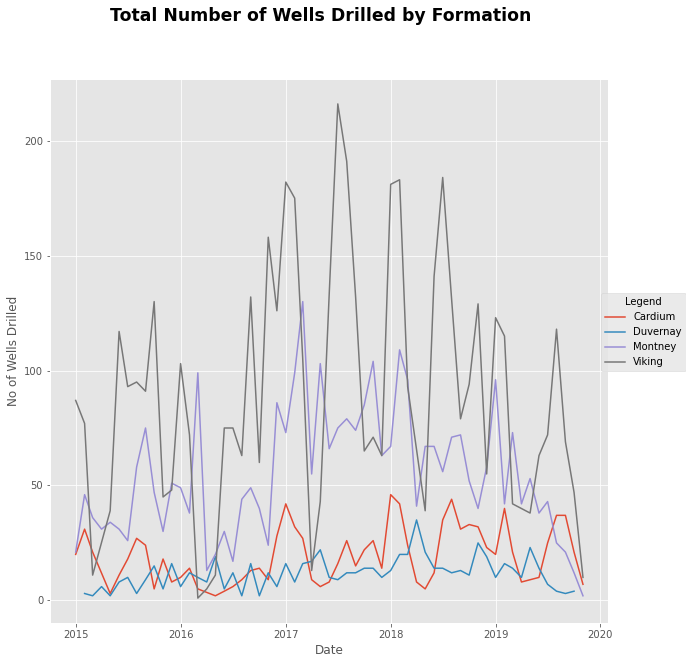

In [45]:
wells_drilled_df = final_df[['CorrectRigReleaseDate','Formation','EPAssetsId']]
wells_drilled_df['RigReleasePeriod'] = wells_drilled_df['CorrectRigReleaseDate'].dt.strftime('%Y-%m')
wells_drilled_df['RigReleasePeriod'] = pd.to_datetime(wells_drilled_df['RigReleasePeriod'])

d = wells_drilled_df[wells_drilled_df['Formation'] == "Viking"]

wells_drilled_df = wells_drilled_df.groupby(["Formation", "RigReleasePeriod"]).agg({'CorrectRigReleaseDate': 'count'}).reset_index()

labels2 =[]
fig, ax1 = plt.subplots(figsize=(10,10))
for formation in wells_drilled_df["Formation"].unique():
    
    ax1.plot(wells_drilled_df[wells_drilled_df["Formation"] == formation]['RigReleasePeriod'], wells_drilled_df[wells_drilled_df["Formation"] == formation]['CorrectRigReleaseDate'])
    labels2.append(formation)
ax1.set_ylabel('No of Wells Drilled')
ax1.set_xlabel('Date')
fig.legend([ax1],  
           labels=labels2,  
           loc="center right",   
           borderaxespad=0.1,    
           title="Legend"  
           )
fig.suptitle("Total Number of Wells Drilled by Formation", fontsize="xx-large", fontweight="bold")

plt.show()

#wells_drilled_df.loc[wells_drilled_df[wells_drilled_df['Formation'] == "Viking"]["CorrectRigReleaseDate"].idxmax()]

Completion Activity By Formation

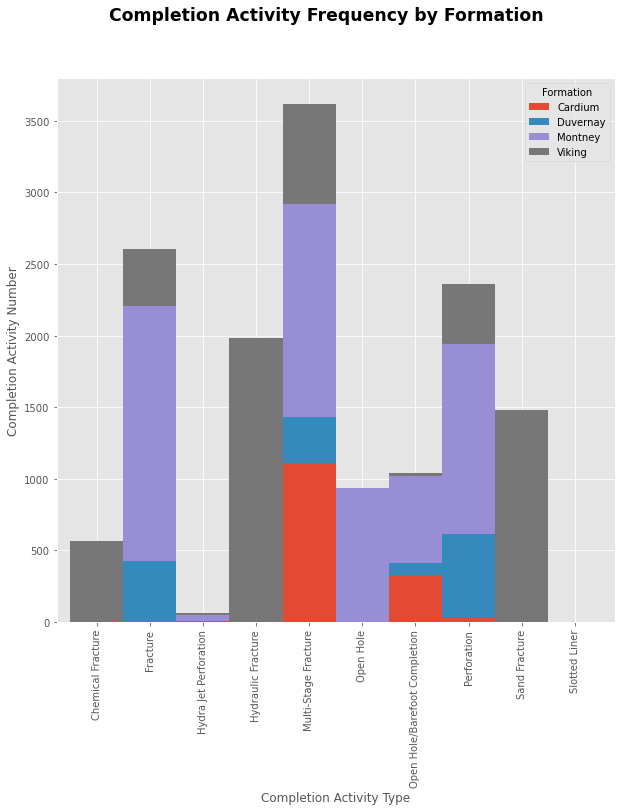

In [46]:
plot_compl_form = pd.DataFrame(columns=['Formation', 'ActivityType', 'TotalCount'])
for formation in compl_form_df['Formation'].unique():
        for i in compl_form_df['ActivityType'].unique():
            plot_compl_form = plot_compl_form.append({'Formation': formation,
                                                      'ActivityType': i, 
                                                      'TotalCount': compl_form_df[(compl_form_df['Formation'] == formation) & (compl_form_df['ActivityType'] == i)]['Count'].sum()},
                                                      ignore_index=True)         

fig, ax1 = plt.subplots(figsize=(10,10))

plot_compl_form.pivot(index="ActivityType", columns='Formation', values="TotalCount").plot(kind="bar", stacked=True, width=1, ax=ax1)
fig.suptitle("Completion Activity Frequency by Formation", fontsize="xx-large", fontweight="bold")

ax1.set_ylabel('Completion Activity Number')
ax1.set_xlabel('Completion Activity Type')
plt.show()